### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#%matplotlib inline

### Display all the columns with max column width

In [2]:
pd.set_option('display.max_column',None)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###Upload the datafile to Google Colab

In [4]:
from google.colab import files
uploaded = files.upload()

Saving employee.csv to employee (1).csv


In [5]:
df = pd.read_csv('employee.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

This is a Employee Data where we have information of various employees working in different companies.

- We have several data fields like Employee Number, Department, Demographics, Education Field, Salary, Percentage Hike etc etc.
- We also have a data point called Attrition that is Binary which shows the employee left or not.

In [6]:
display(df.shape)
display(df['EmployeeNumber'].nunique())

(1470, 35)

1470

- There are 1470 rows and 35 columns in the data.
- The number of unique Employee Ids is same as the number of rows in the table which indicates that the data is at an Employee Level.
- Every count we take across dimensions here will be count of the Employees.



- 65.4%(highest) of Employees belong to R&D department.
- 30.3% Employees belong to Sales department.
- 4.3%(lowest) Employees belong to HR department.

In [7]:
df.drop('EmployeeCount',axis =1, inplace=True)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [8]:
# mapping categories with categories [1,2,3,4] to ['Low','Medium','High','Very High']
satisfaction_map = {1: 'Low',2: 'Medium',3: 'High',4: 'Very High'}
education_map = {1:"Below School",2:"School",3:"Bachelors",4:"Masters",5:"PhD"}
job_level_map = {1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",5:"Executive Level"}
wlb_map = {1:"Poor",2:"Average",3:"Good",4:"Excellent"}
department_map = {'Research & Development':'R&D','Sales':'Sales','Human Resources':'HR'}

df['EnvironmentSatisfaction'] =  df['EnvironmentSatisfaction'].map(satisfaction_map)
df['JobSatisfaction'] =  df['JobSatisfaction'].map(satisfaction_map)
df['RelationshipSatisfaction'] =  df['RelationshipSatisfaction'].map(satisfaction_map)
df['JobInvolvement'] =  df['JobInvolvement'].map(satisfaction_map)

df['Education'] =  df['Education'].map(education_map)
df['JobLevel'] =  df['JobLevel'].map(job_level_map)
df['WorkLifeBalance'] =  df['WorkLifeBalance'].map(wlb_map)

df['PerformanceRating'] = np.where(df['PerformanceRating'] ==3,'Good','Excellent')

df['Department'] = df['Department'].map(department_map)

df.head()


Age Attrition     BusinessTravel  DailyRate Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely       1102      Sales                 1   
1   49        No  Travel_Frequently        279        R&D                 8   
2   37       Yes      Travel_Rarely       1373        R&D                 2   
3   33        No  Travel_Frequently       1392        R&D                 3   
4   27        No      Travel_Rarely        591        R&D                 2   

      Education EducationField  EmployeeNumber EnvironmentSatisfaction  \
0        School  Life Sciences               1                  Medium   
1  Below School  Life Sciences               2                    High   
2        School          Other               4               Very High   
3       Masters  Life Sciences               5               Very High   
4  Below School        Medical               7                     Low   

   Gender  HourlyRate JobInvolvement      JobLevel                JobRole  \
0  Female          94           High  Junior Level        Sales Executive   
1    Male          61         Medium  Junior Level     Research Scientist   
2    Male          92         Medium   Entry Level  Laboratory Technician   
3  Female          56           High   Entry Level     Research Scientist   
4    Male          40           High   Entry Level  Laboratory Technician   

  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0       Very High        Single           5993        19479   
1          Medium       Married           5130        24907   
2            High        Single           2090         2396   
3            High       Married           2909        23159   
4          Medium       Married           3468        16632   

   NumCompaniesWorked Over18 OverTime  PercentSalaryHike PerformanceRating  \
0                   8      Y      Yes                 11              Good   
1                   1      Y       No                 23         Excellent   
2                   6      Y      Yes                 15              Good   
3                   1      Y      Yes                 11              Good   
4                   9      Y       No                 12              Good   

  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                      Low             80                 0   
1                Very High             80                 1   
2                   Medium             80                 0   
3                     High             80                 0   
4                Very High             80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0            Poor               6   
1                 10                      3            Good              10   
2                  7                      3            Good               0   
3                  8                      3            Good               8   
4                  6                      3            Good               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

###Percentage of Employees across Organisational Dimensions

In [9]:
categorical_cols1 =['Department',
'BusinessTravel',
'Education',
'EducationField',
'EnvironmentSatisfaction',
'Gender',
'JobInvolvement',
'JobLevel']

categorical_cols2=[
'JobRole',
'JobSatisfaction',
'MaritalStatus',
'OverTime',
'PerformanceRating',
'RelationshipSatisfaction',
'WorkLifeBalance',
'Attrition']

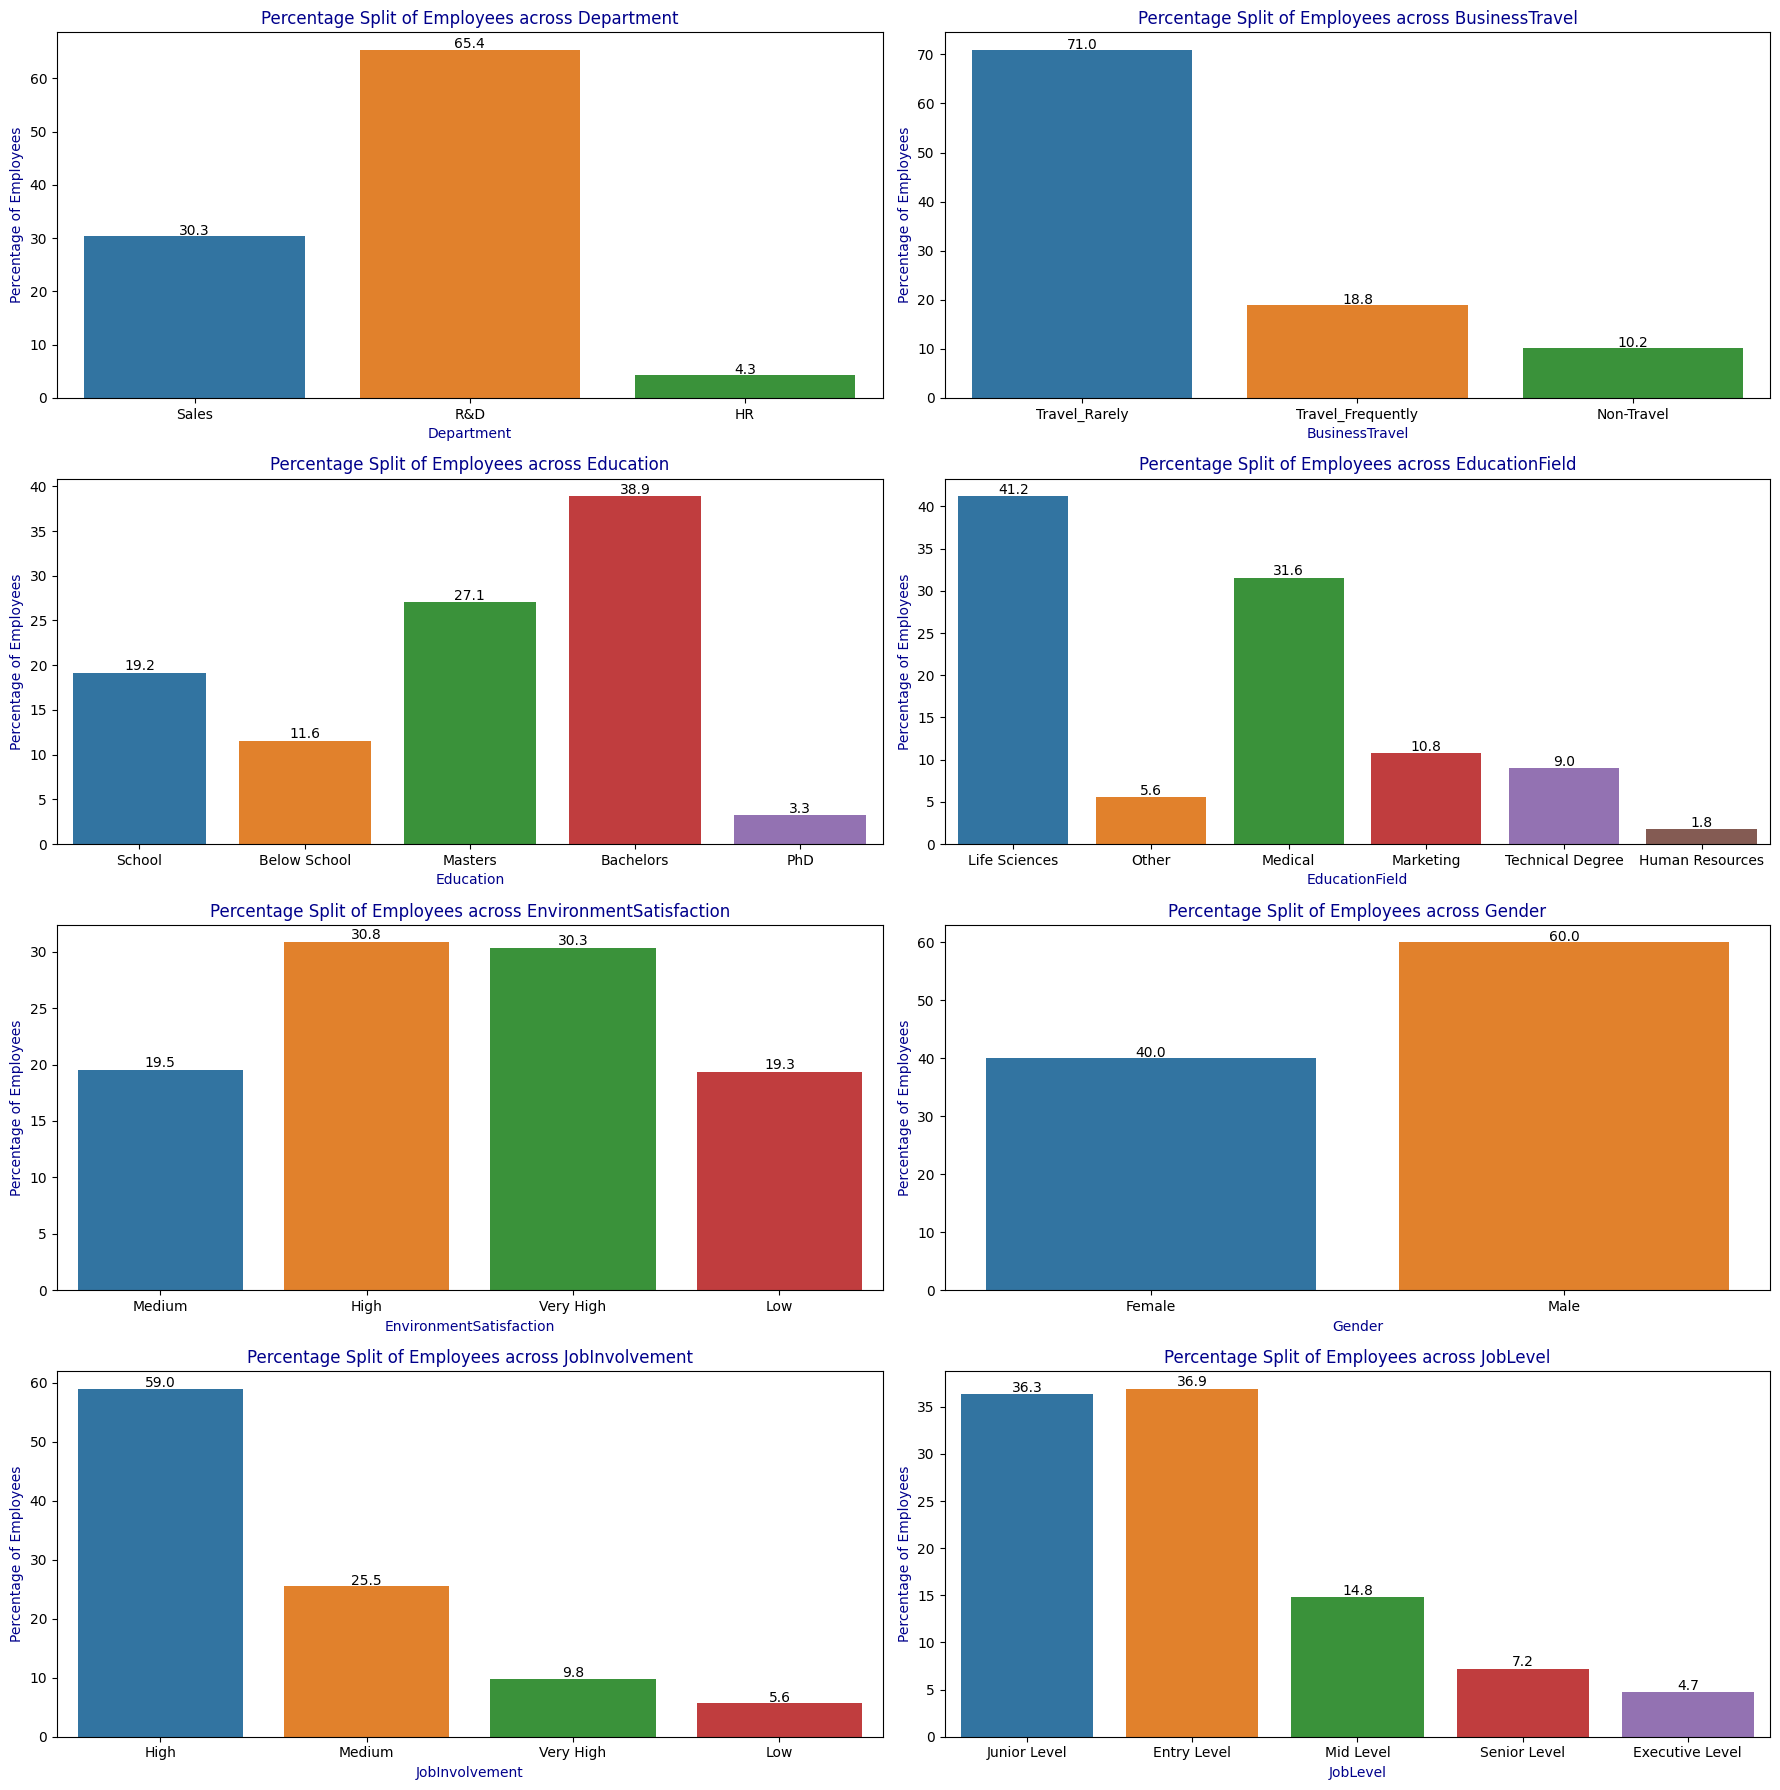

In [10]:
fig,axes = plt.subplots(4,2, figsize=(18,18))
axes = axes.flatten()
k=0
for i in categorical_cols1:
  unique_vals = df[i].nunique()
  palette = sns.color_palette("tab10", unique_vals)  # or try "Paired", "husl", "tab10"

  sns.countplot(data = df, x= i, stat = 'percent', ax=axes[k], palette = palette)
  for bar in axes[k].patches:
    height = bar.get_height()
    axes[k].text(bar.get_x() + bar.get_width() / 2, height + 0.25,
            f'{height:.1f}', ha='center', fontsize=10)
  axes[k].set_title(f"Percentage Split of Employees across {i}", color ='darkblue')
  axes[k].set_xlabel(f'{i}',color ='darkblue')
  axes[k].set_ylabel('Percentage of Employees',color ='darkblue')
  k+=1

plt.tight_layout()
plt.show()

#### 📊 Key Insights

---

## 📊 1. Employee Distribution by Department
- **R&D**: 65.4% – Primary operational focus.
- **Sales**: 30.3% – Major support function.
- **HR**: 4.3% – Lean staffing.

---

## ✈️2. Business Travel Frequency
- **Travel Rarely**: 71% – Mostly locally-based roles.
- **Travel Frequently**: 18.8%
- **Non-Travel**: 10.2%

---

## 🎓3. Education Level Split
- **Bachelor’s**: 38.3% – Majority.
- **Master’s**: 27.1%
- **Below School**: 11.6%
- **PhD**: 3.3%

---

## 🧪4. Education Field
- **Life Sciences**: 41.7%
- **Medical**: 31.6%
- **Technical Degree**: 10.1%
- **Marketing**: 5.2%
- **HR**: 1.8%

---

## 🌿5. Environment Satisfaction
- **High**: 30.8%
- **Very High**: 30.3%
- **Medium**: 19.1%
- **Low**: 19.8%

✅ Majority are satisfied; morale appears healthy.

---

## 🚻6. Gender Distribution
- **Male**: 60%
- **Female**: 40%

---

## 🔧7. Job Involvement Levels
- **High**: 57%
- **Very High**: 9.8%
- **Medium**: 27.6%
- **Low**: 5.6%

🔍 Opportunity: Encourage deeper involvement beyond just “high.”

---

## 📈8. Job Level Hierarchy
- **Entry & Junior**: 36.3% each – Mostly early-career workforce.
- **Mid Level**: 14.8%
- **Senior + Executive**: 12.6%

---


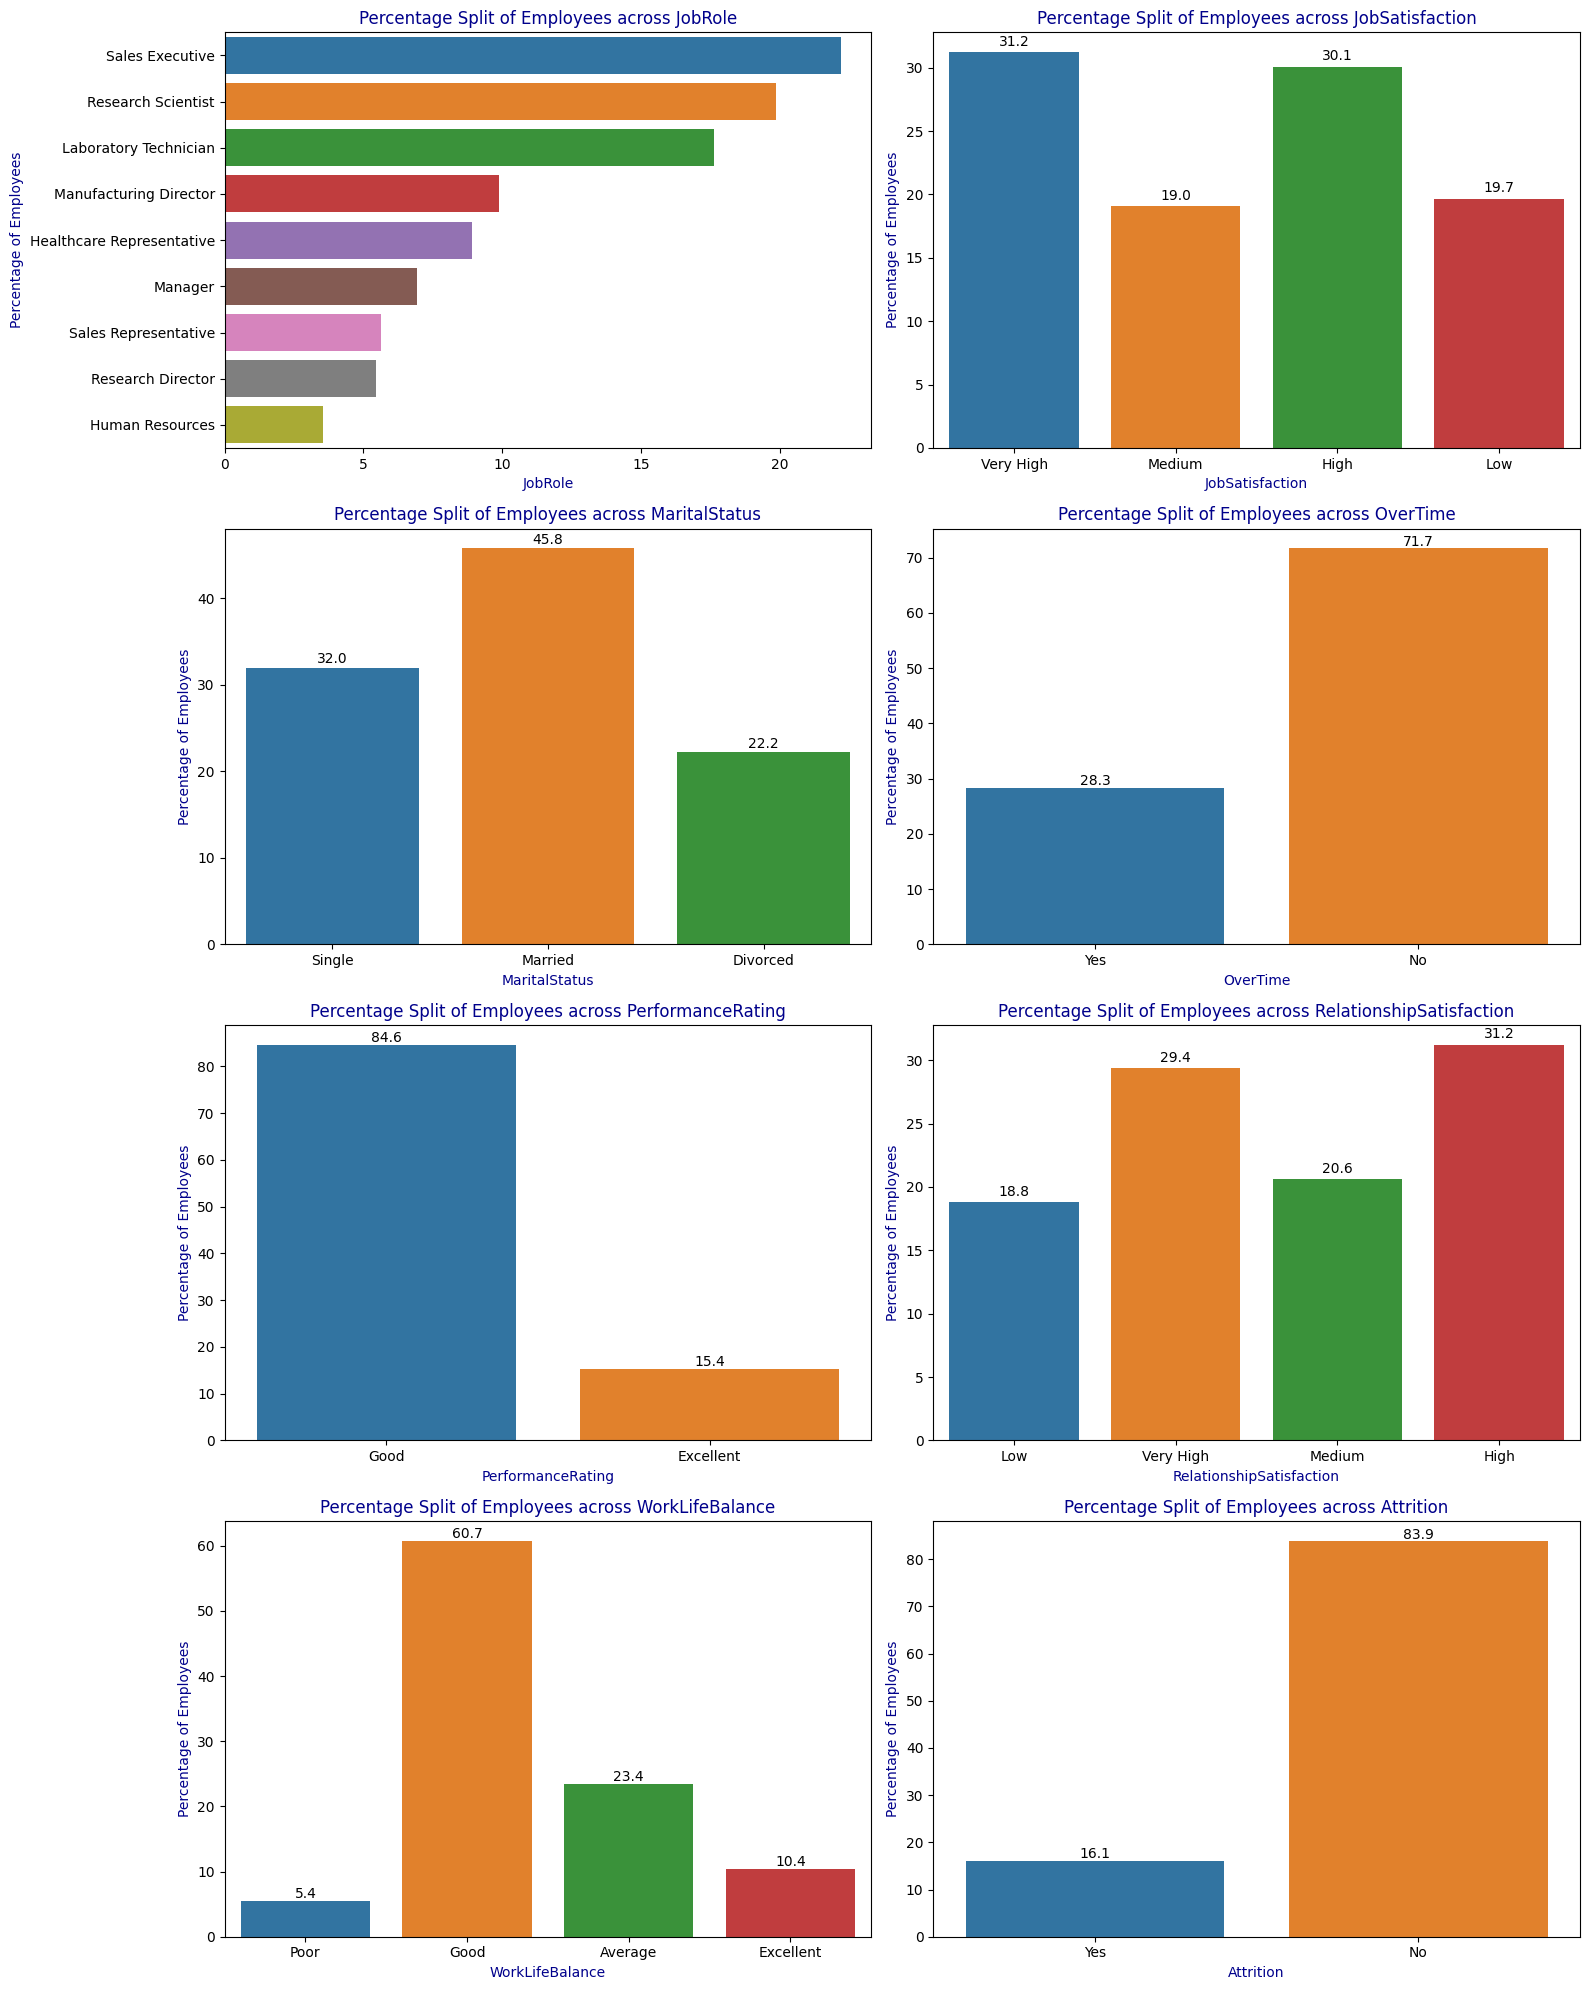

In [11]:
fig,axes = plt.subplots(4,2, figsize=(16,20))
axes = axes.flatten()
k=0
for i in categorical_cols2:
  if i =='JobRole':

    unique_vals = df[i].nunique()
    palette = sns.color_palette("tab10", unique_vals)  # or try "Paired", "husl", "tab10"

    sns.countplot(data = df, y= i, stat = 'percent', ax=axes[k], palette = palette)

    axes[k].set_title(f"Percentage Split of Employees across {i}", color ='darkblue')
    axes[k].set_xlabel(f'{i}',color ='darkblue')
    axes[k].set_ylabel('Percentage of Employees',color ='darkblue')
    k+=1
  else:
    unique_vals = df[i].nunique()
    palette = sns.color_palette("tab10", unique_vals)  # or try "Paired", "husl", "tab10"

    sns.countplot(data = df, x= i, stat = 'percent', ax=axes[k], palette = palette)
    for bar in axes[k].patches:
      height = bar.get_height()
      axes[k].text(bar.get_x() + bar.get_width() / 2, height + 0.5,
              f'{height:.1f}', ha='center', fontsize=10)
    axes[k].set_title(f"Percentage Split of Employees across {i}", color ='darkblue')
    axes[k].set_xlabel(f'{i}',color ='darkblue')
    axes[k].set_ylabel('Percentage of Employees',color ='darkblue')
    k+=1

plt.tight_layout()
plt.show()

#### 📊 Key Insights

This markdown summarizes insights from the latest employee data visualizations.

---

## 9. Job Role Distribution
- **Sales Executive**: 30%
- **Research Scientist**: 20%
- **Laboratory Technician**: 15%
- **Manufacturing Director**: 10%
- **Healthcare Representative**: 8%
- **Manager**: 7%
- **Sales Representative**: 5%
- **Research Director**: 3%
- **Human Resources**: 2%

🧠 *Sales and Research roles dominate — points toward core business functions.*

---

## 10. Job Satisfaction Levels
- **Very High**: 31.2%
- **High**: 30.1%
- **Medium**: 19%
- **Low**: 19.7%

📈 *Majority feel positive, but nearly 20% report dissatisfaction.*

---

## 11. Marital Status
- **Married**: 45.8%
- **Single**: 32%
- **Divorced**: 22.2%

👪 *Balanced mix, with married employees forming the largest group.*

---

## 12. OverTime Participation
- **No**: 71.7%
- **Yes**: 28.3%

🕒 *Most employees do not work overtime — could suggest work-life balance or labor policies.*

---

## 12. Performance Rating
- **Good**: 84.6%
- **Excellent**: 15.4%

⭐ *Few top-tier performers — possible opportunity to recognize and develop high-performers.*

---

## 14. Relationship Satisfaction
- **High**: 31.2%
- **Very High**: 29.4%
- **Medium**: 20.6%
- **Low**: 18.8%

💬 *Workplace relationships are mostly strong — correlates with job satisfaction trends.*

---

## 15. Work-Life Balance Ratings
- **Good**: 60.7%
- **Average**: 23.4%
- **Excellent**: 10.4%
- **Poor**: 5.4%

⚖️ *Majority satisfied, but only a small fraction rate it as “Excellent” — room for enhancement.*

---

## 16. Attrition
- **No**: 83.9%
- **Yes**: 16.1%

🚪 *Retention appears strong; understanding attrition drivers could further strengthen workforce stability.*

---

### Percentage of Employees across Each Combination of Categorical Variables

In [12]:
import itertools

# Generate all combinations as order doesn't matter and catesian products across two groups
combinations1 = list(itertools.combinations(categorical_cols1,2))
combinations2 = list(itertools.combinations(categorical_cols2,2))
product1 = list(itertools.product(categorical_cols1,categorical_cols2))

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

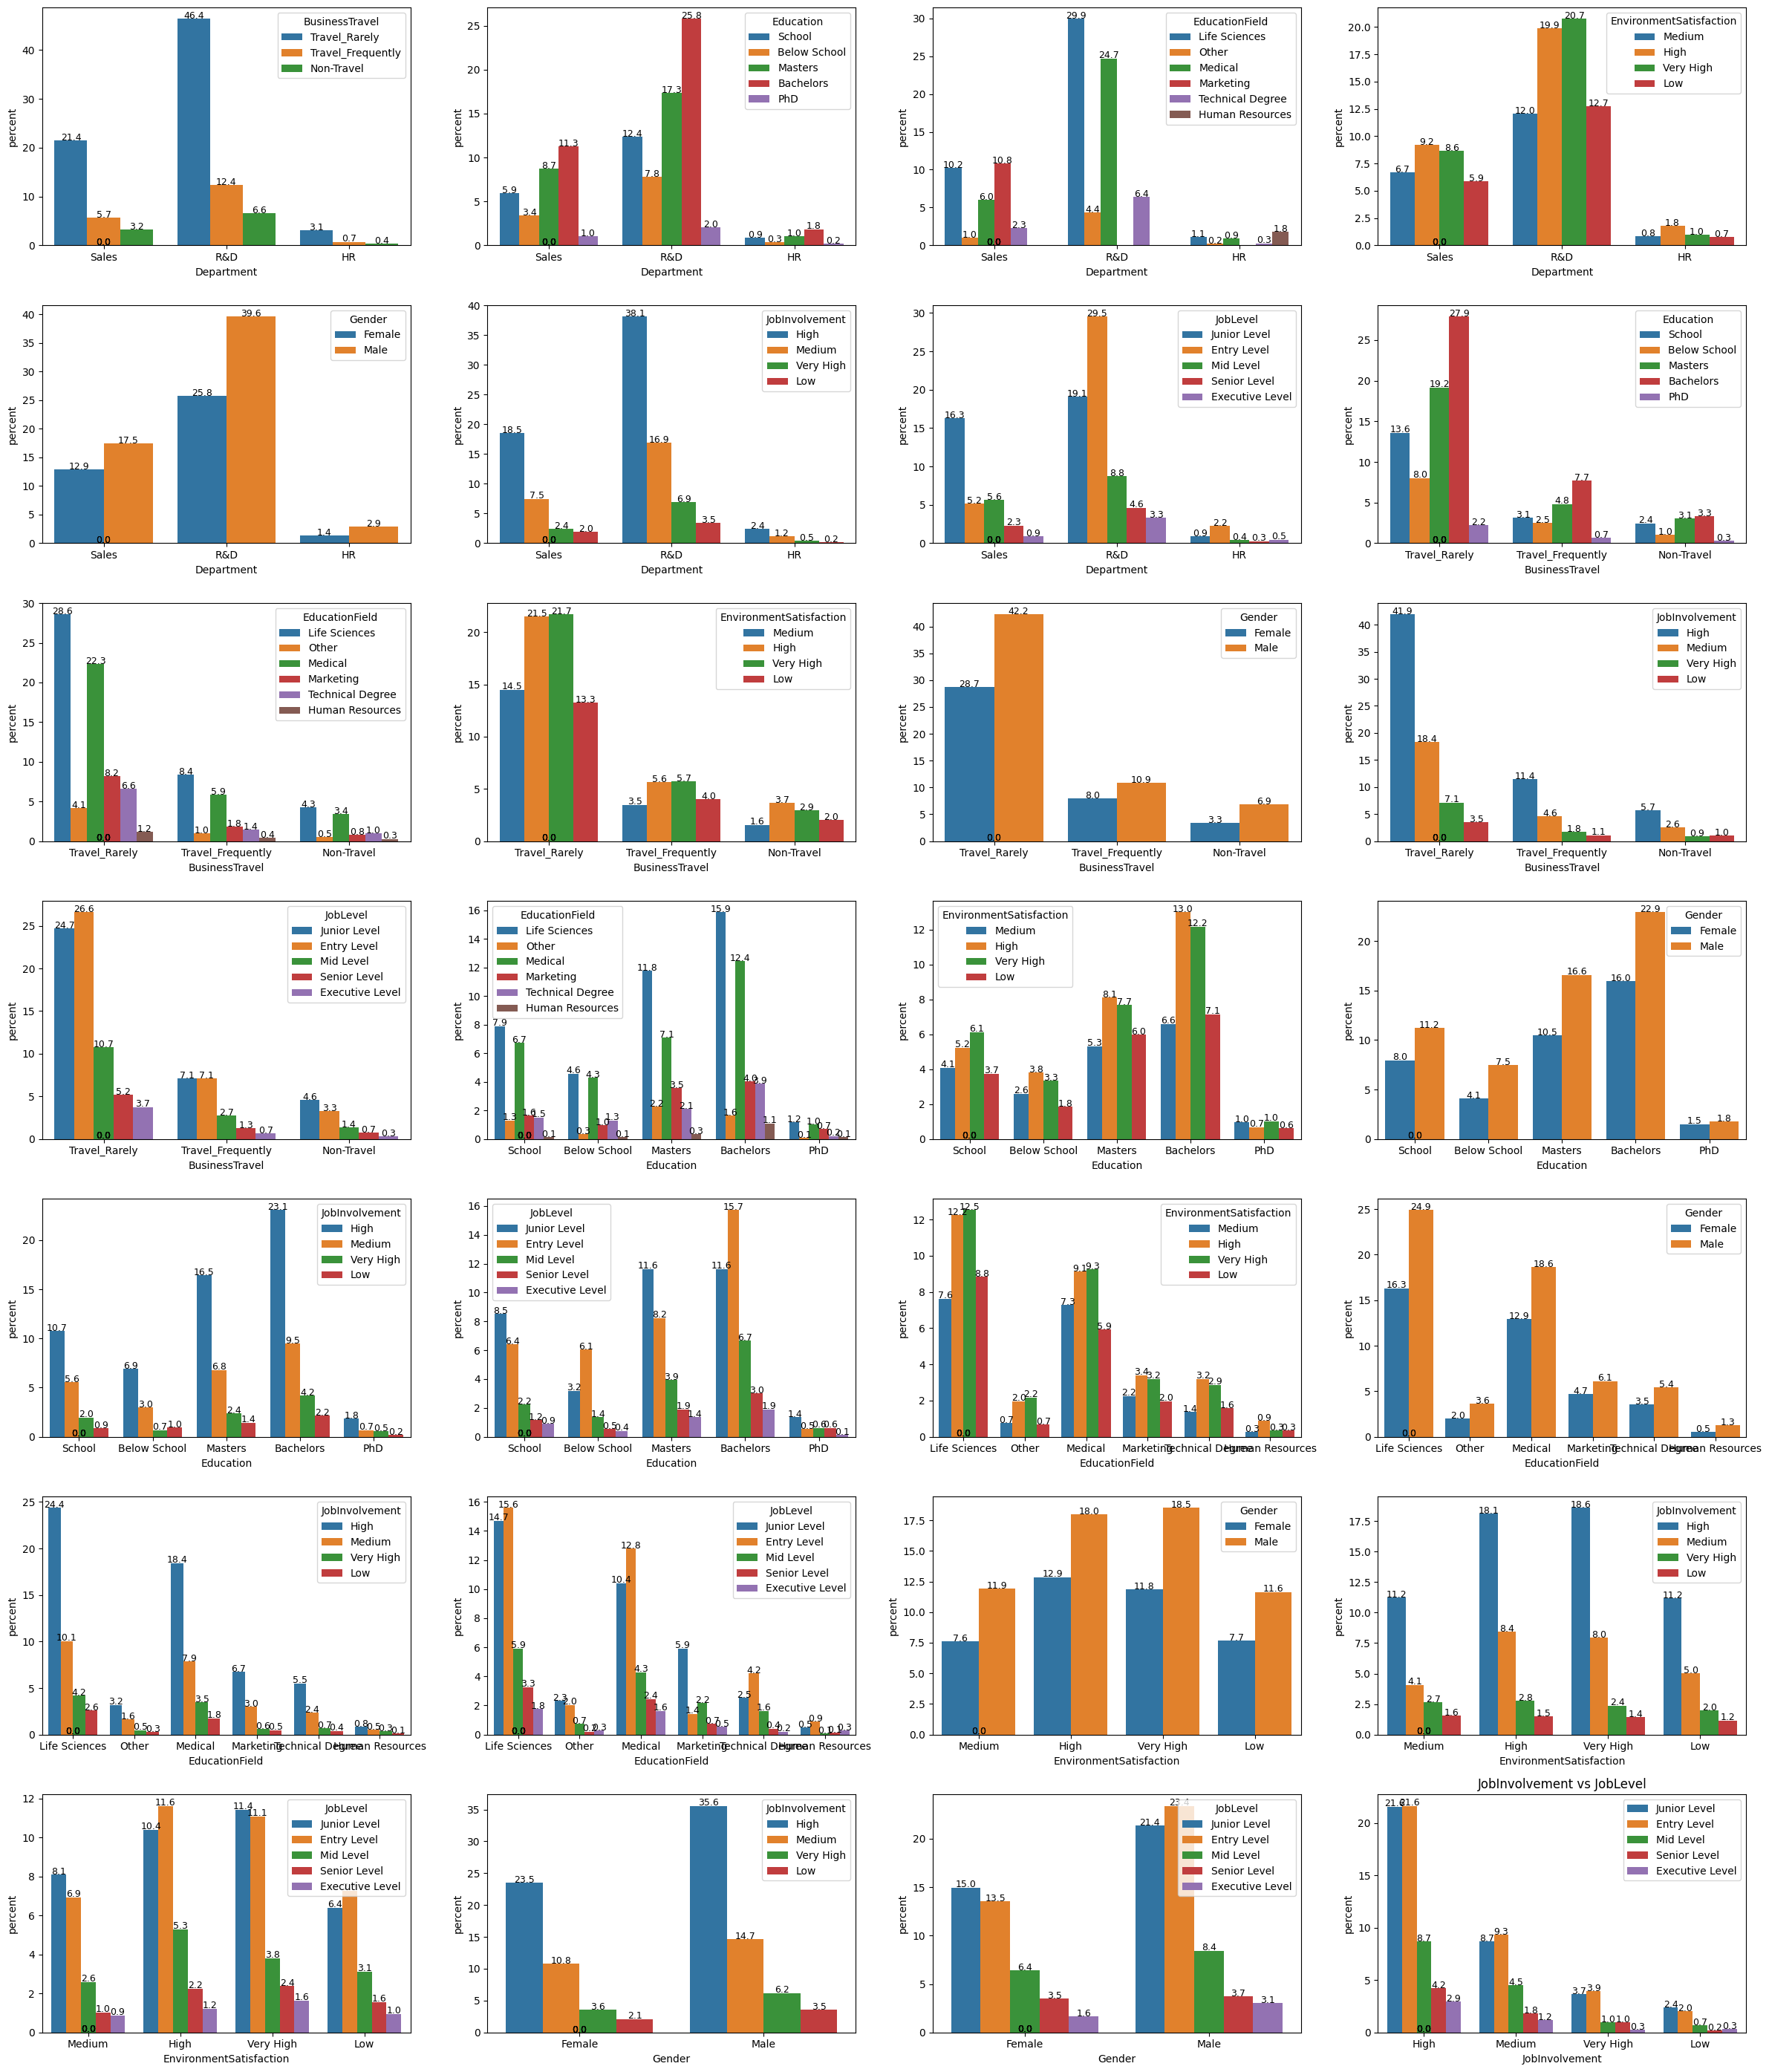

In [14]:
fig, axes = plt.subplots(7, 4, figsize=(24, 28))
axes = axes.flatten()
k=0

for x_col, hue_col in combinations1:
  sns.countplot(data=df, x=x_col, hue=hue_col,ax=axes[k], palette='tab10', stat ='percent')
  for bar in axes[k].patches:
    height = bar.get_height()
    axes[k].text(bar.get_x() + bar.get_width() / 2, height + 0.02,
                 f'{height:.1f}', ha='center', fontsize=9)
  plt.title(f'{x_col} vs {hue_col}')
  k+=1

plt.legend(loc='upper right',bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

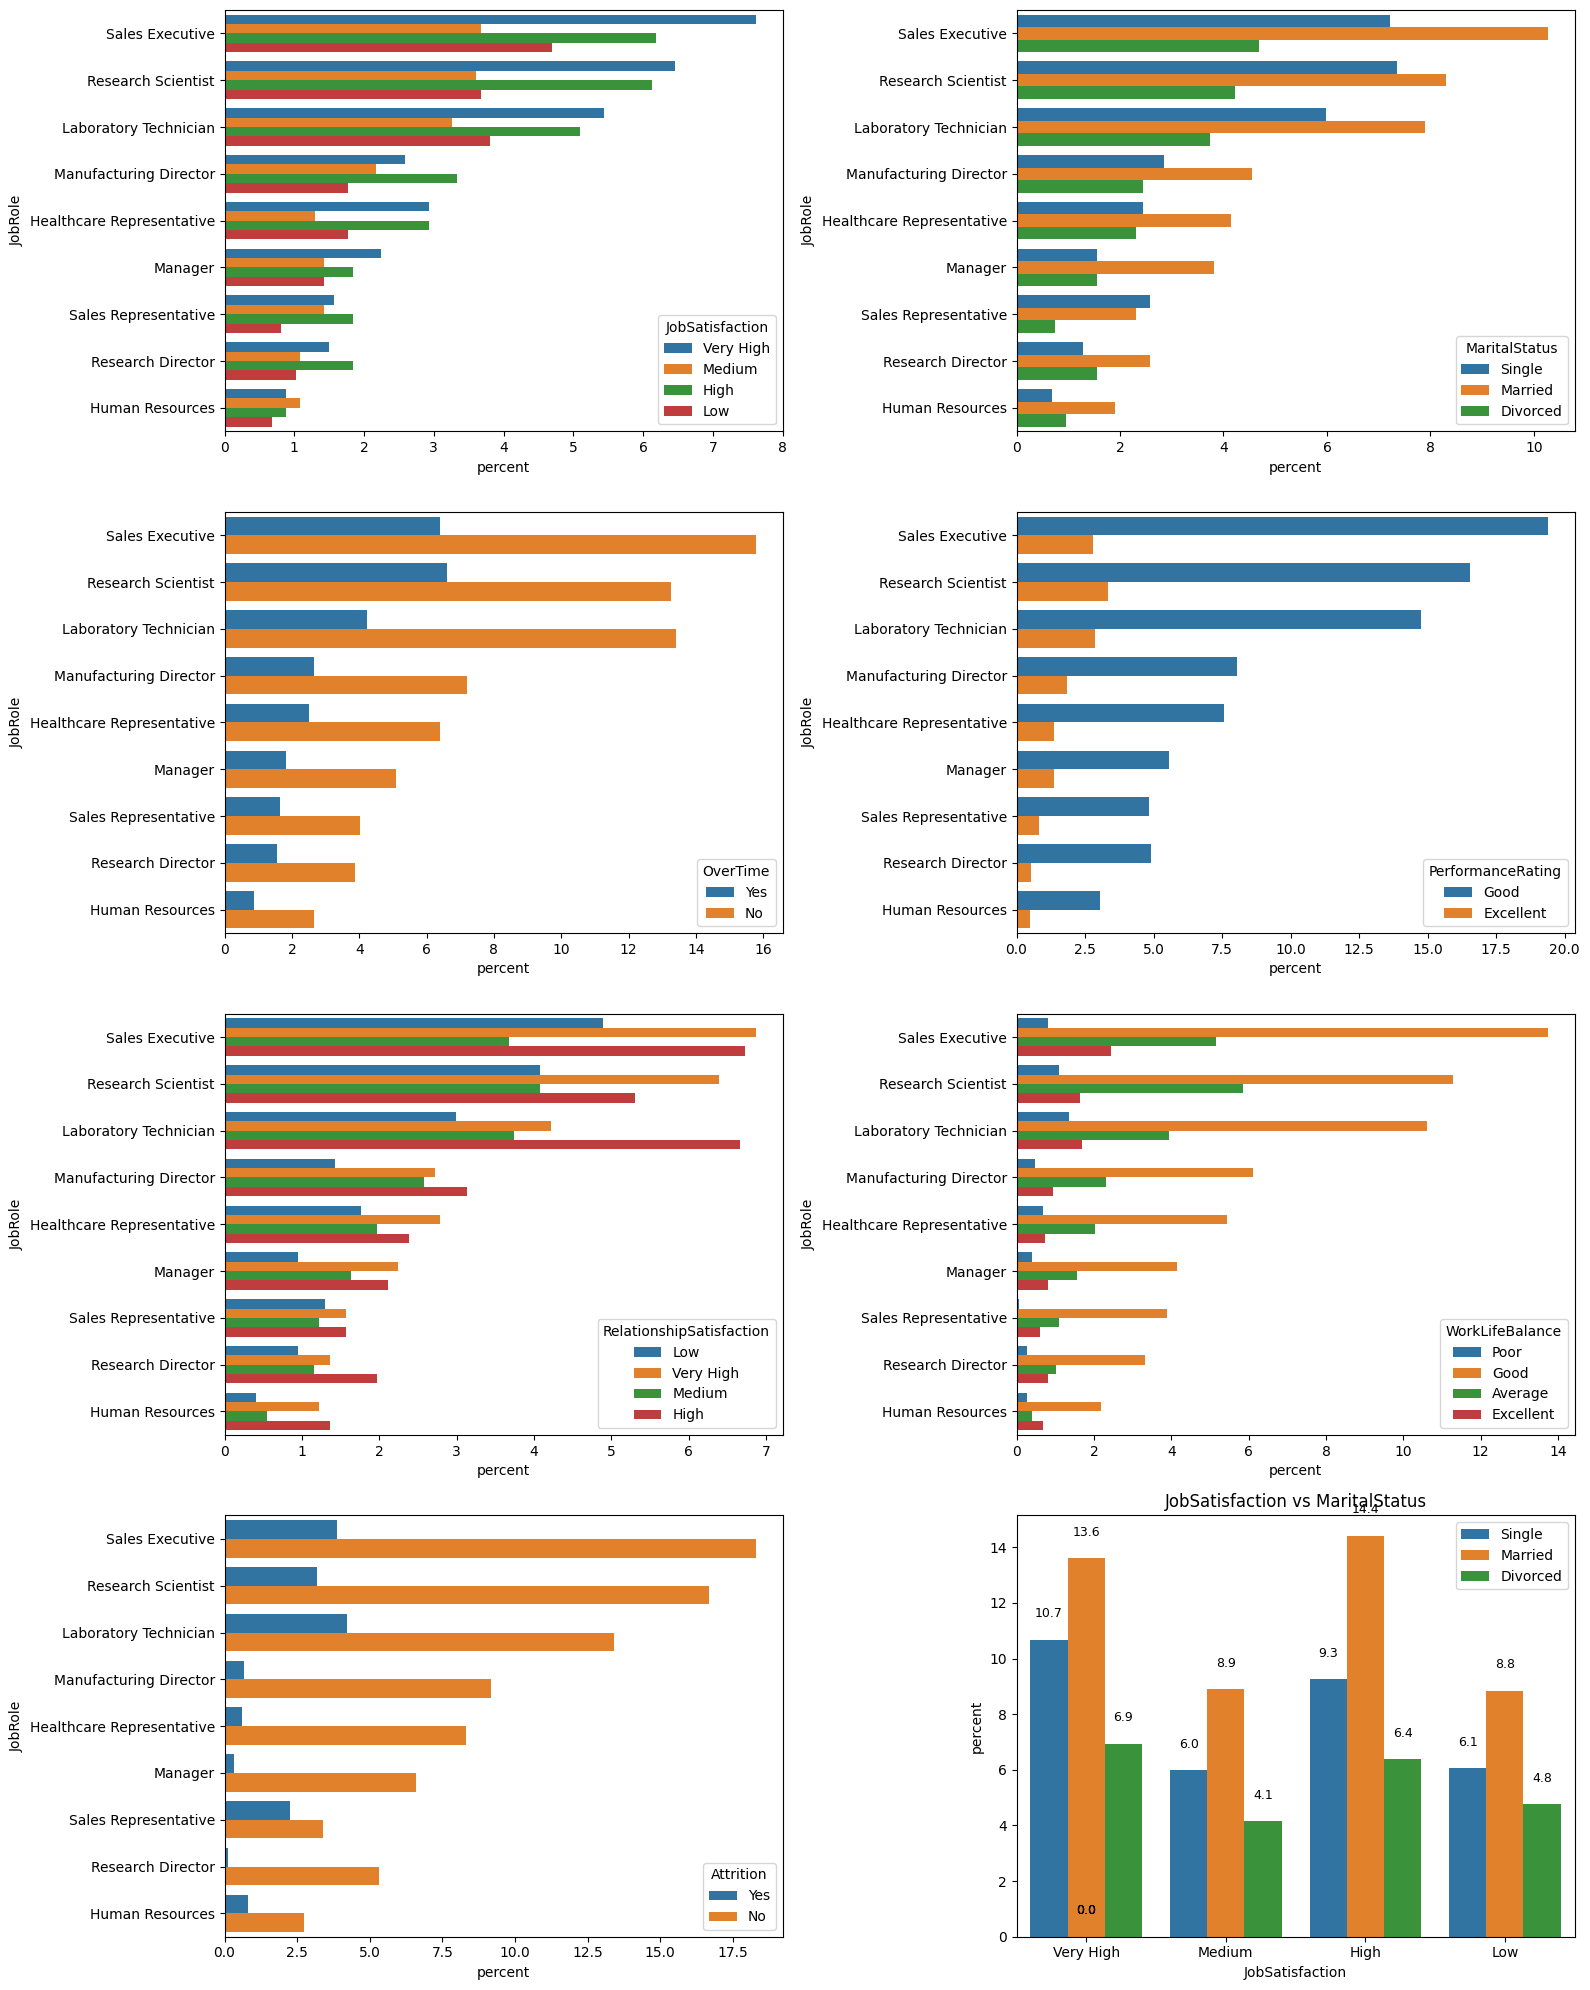

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()
k=0

for x_col, hue_col in combinations2[0:8]:
  if x_col == 'JobRole':
    sns.countplot(data=df, y=x_col, hue=hue_col,ax=axes[k], palette='tab10', stat ='percent')
  else:
    sns.countplot(data=df, x=x_col, hue=hue_col,ax=axes[k], palette='tab10', stat ='percent')
    for bar in axes[k].patches:
      height = bar.get_height()
      axes[k].text(bar.get_x() + bar.get_width() / 2, height + 0.8,
                    f'{height:.1f}', ha='center', fontsize=9)
  plt.title(f'{x_col} vs {hue_col}')
  k+=1

plt.legend(loc='upper right',bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

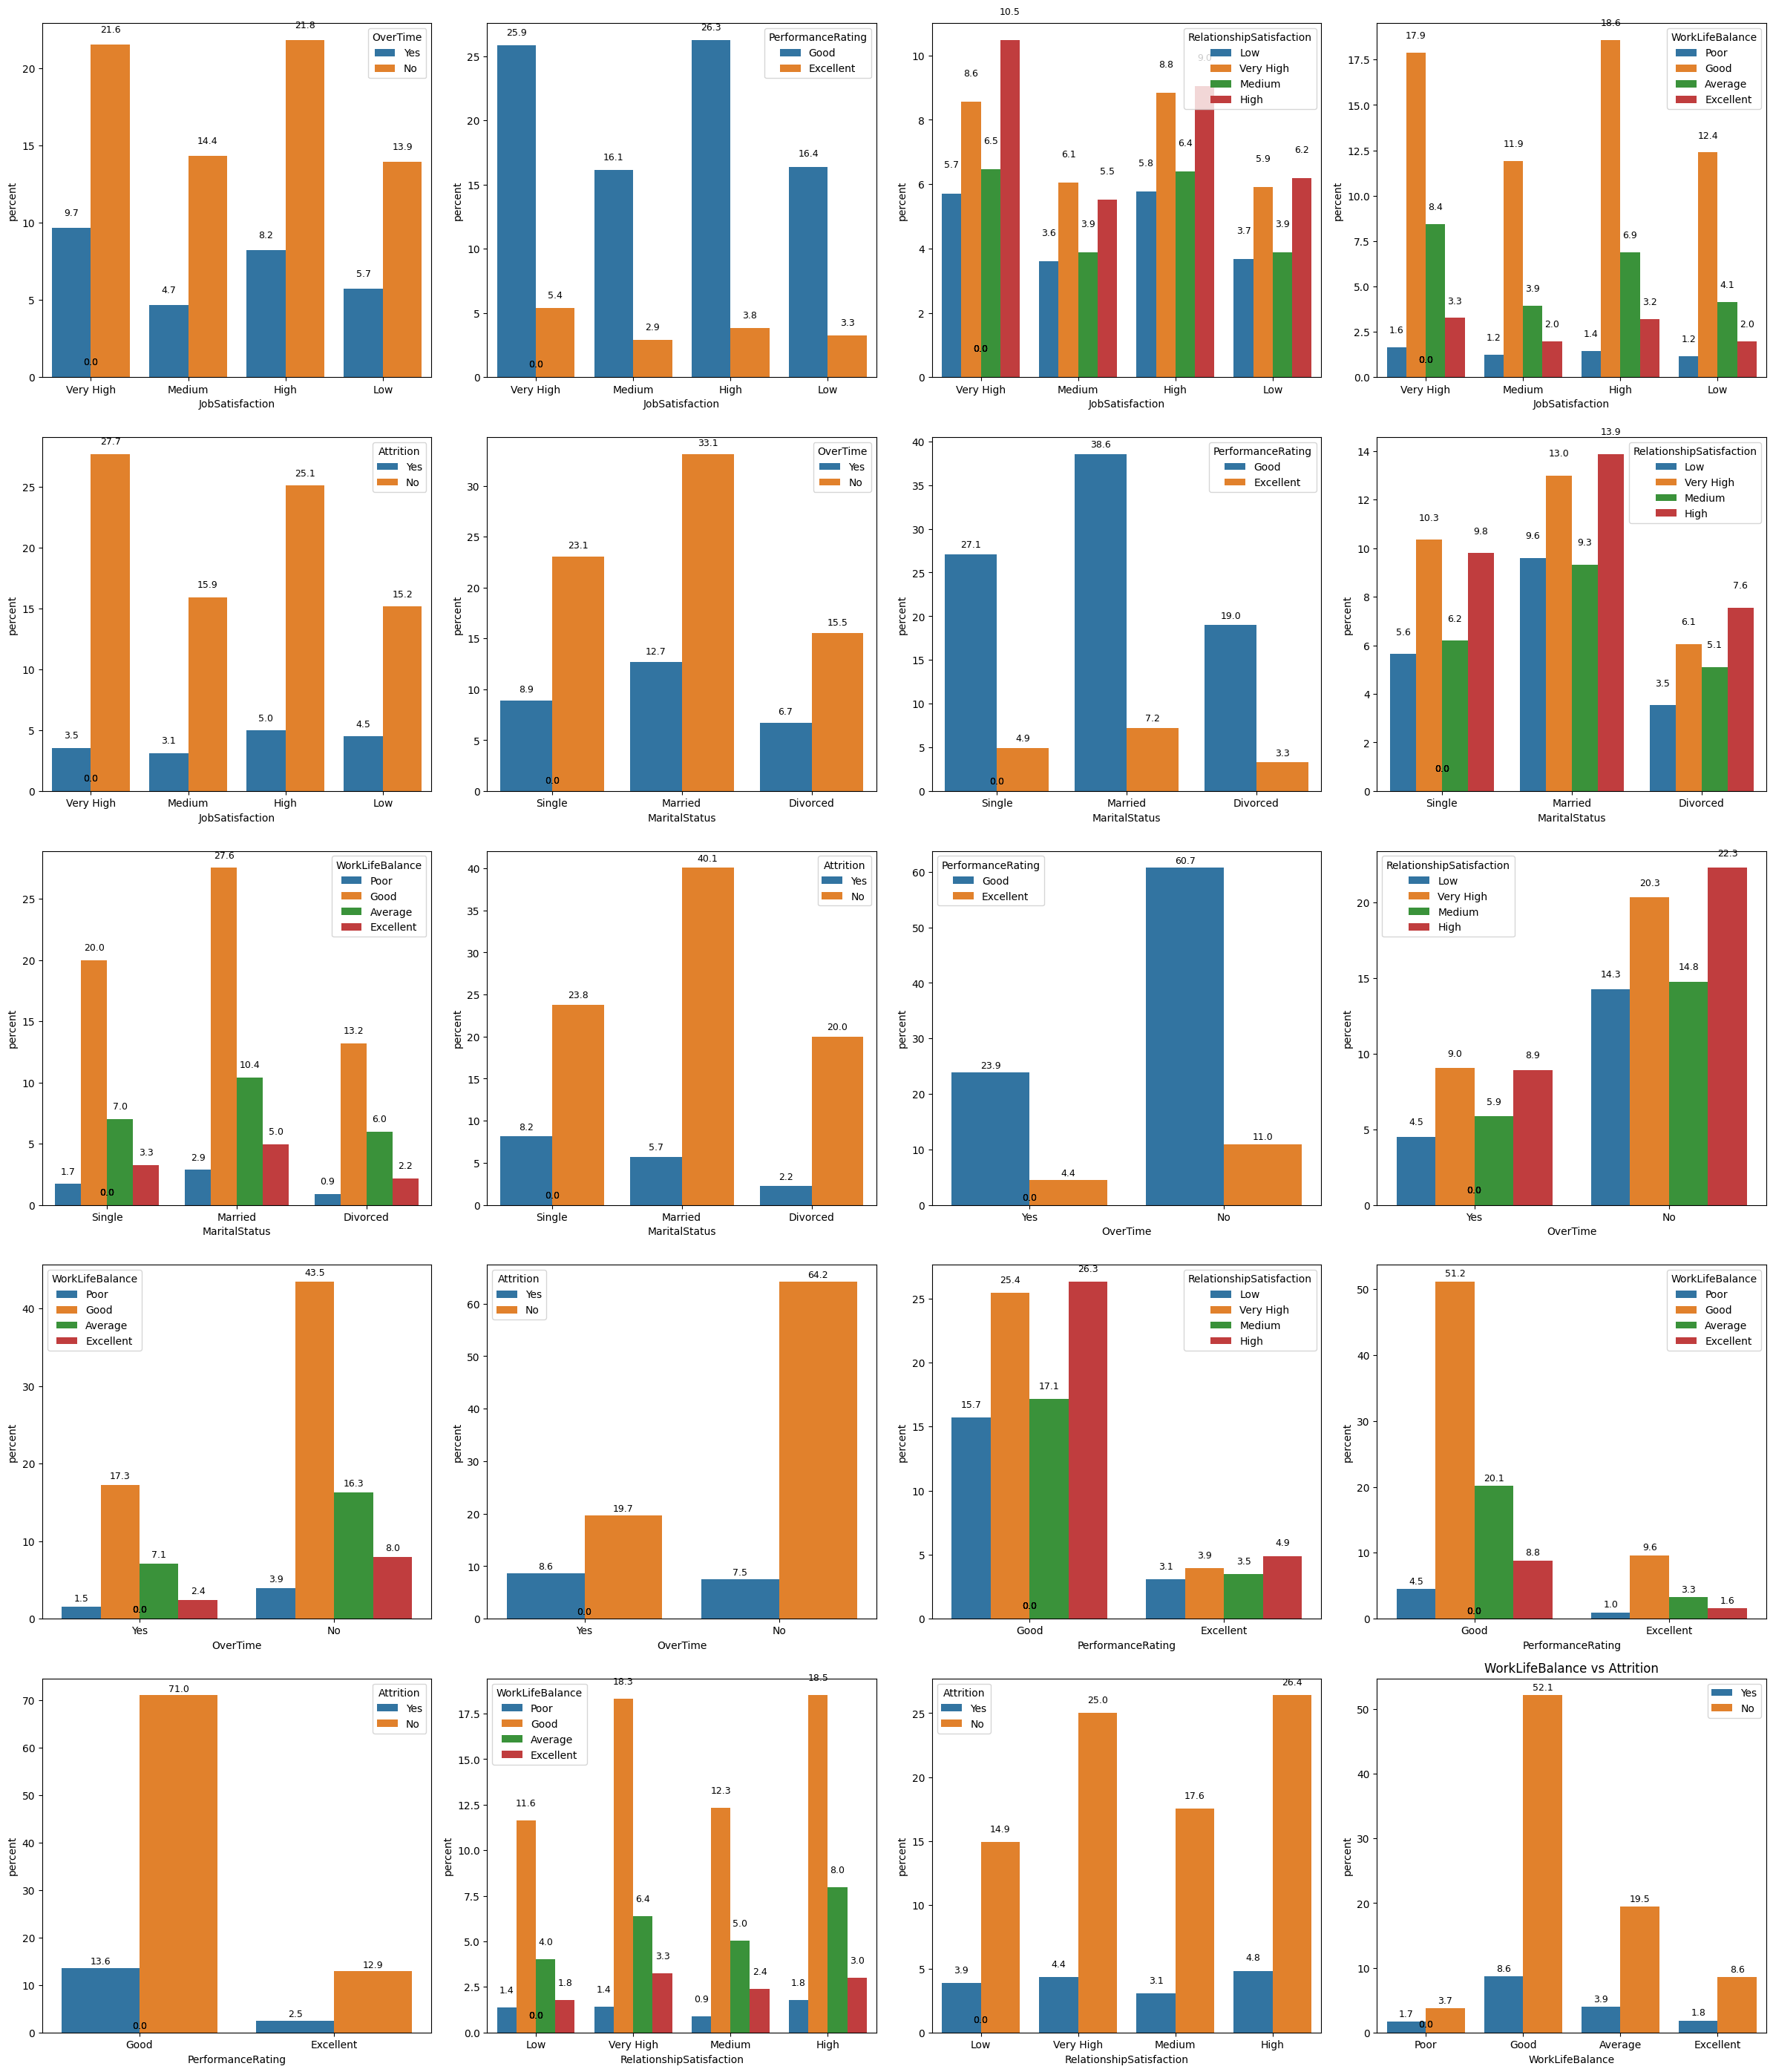

In [16]:
fig, axes = plt.subplots(5, 4, figsize=(24, 28))
axes = axes.flatten()
k=0

for x_col, hue_col in combinations2[8:]:
    sns.countplot(data=df, x=x_col, hue=hue_col,ax=axes[k], palette='tab10', stat ='percent')
    for bar in axes[k].patches:
      height = bar.get_height()
      axes[k].text(bar.get_x() + bar.get_width() / 2, height + 0.8,
                   f'{height:.1f}', ha='center', fontsize=9)
    plt.title(f'{x_col} vs {hue_col}')
    k+=1

plt.legend(loc='upper right',bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

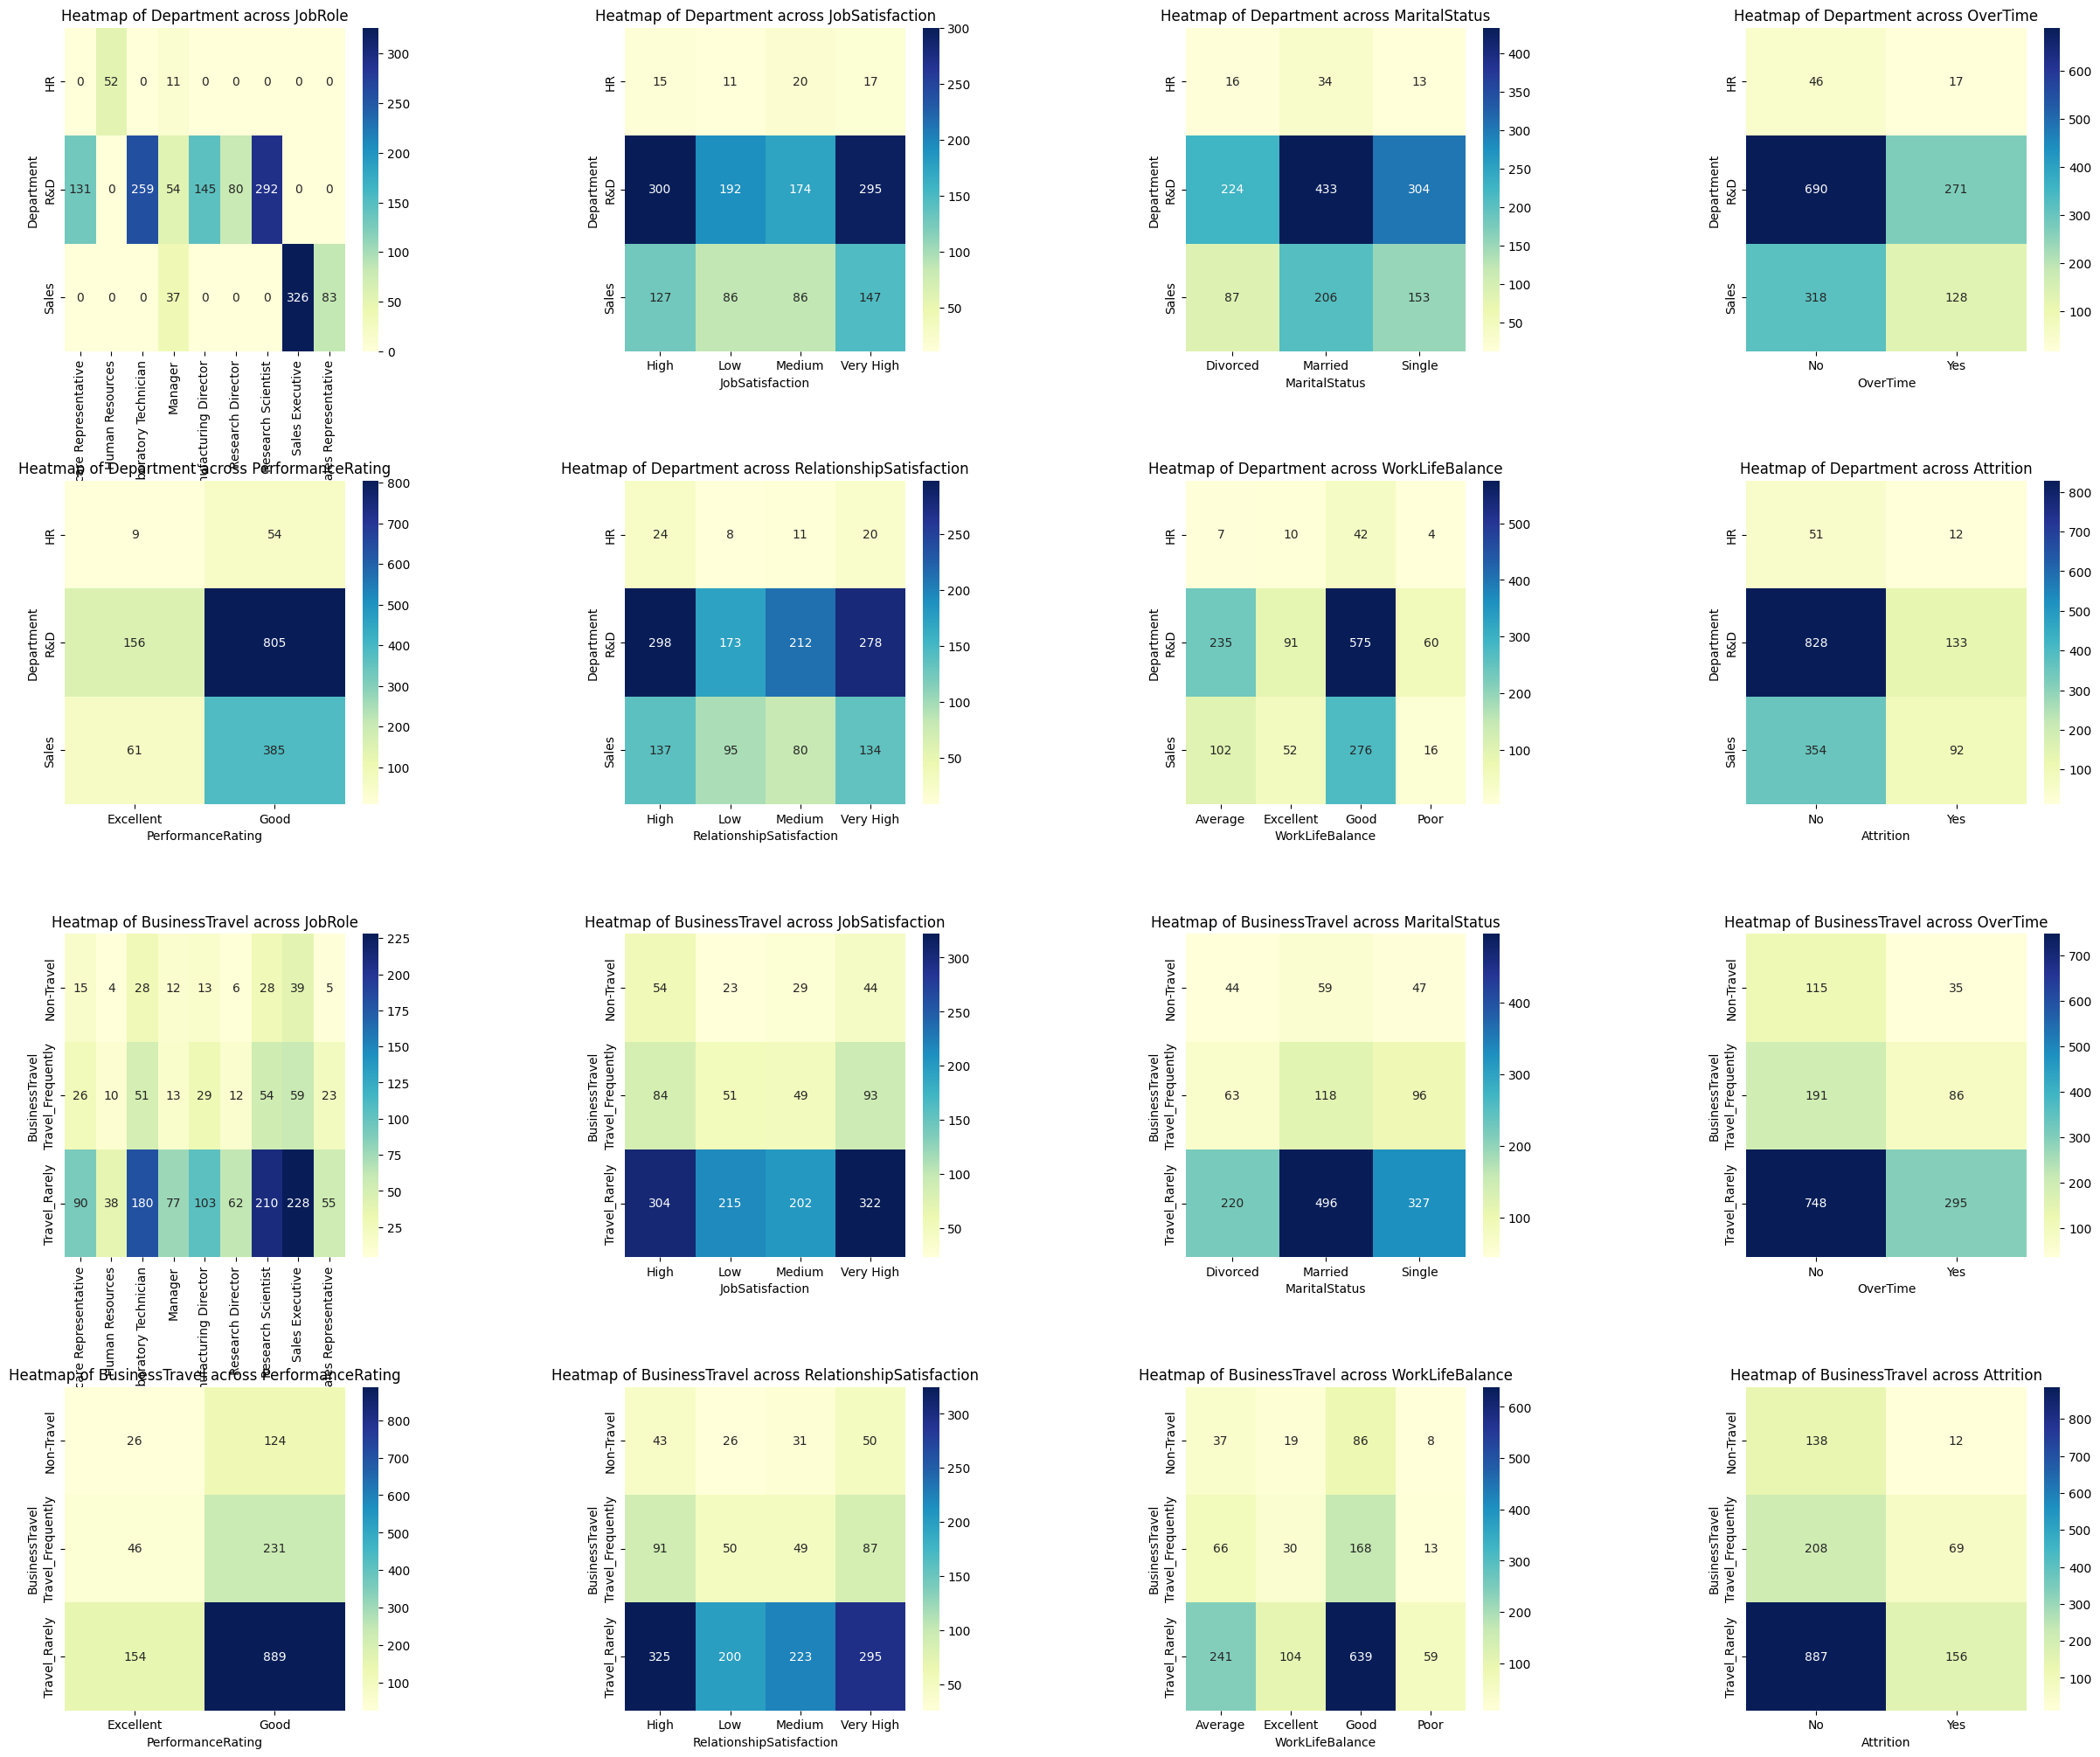

In [17]:
fig,axes = plt.subplots(4,4, figsize = (30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.6)
axes = axes.flatten()
k=0

for x_col, hue_col in product1[0:16]:
  ct = pd.crosstab(df[x_col],df[hue_col])
  sns.heatmap(ct, annot = True, cmap='YlGnBu', fmt='d', ax=axes[k])
  axes[k].set_title(f'Heatmap of {x_col} across {hue_col}')
  axes[k].set_ylabel(f'{x_col}')
  axes[k].set_xlabel(f'{hue_col}')

  k+=1

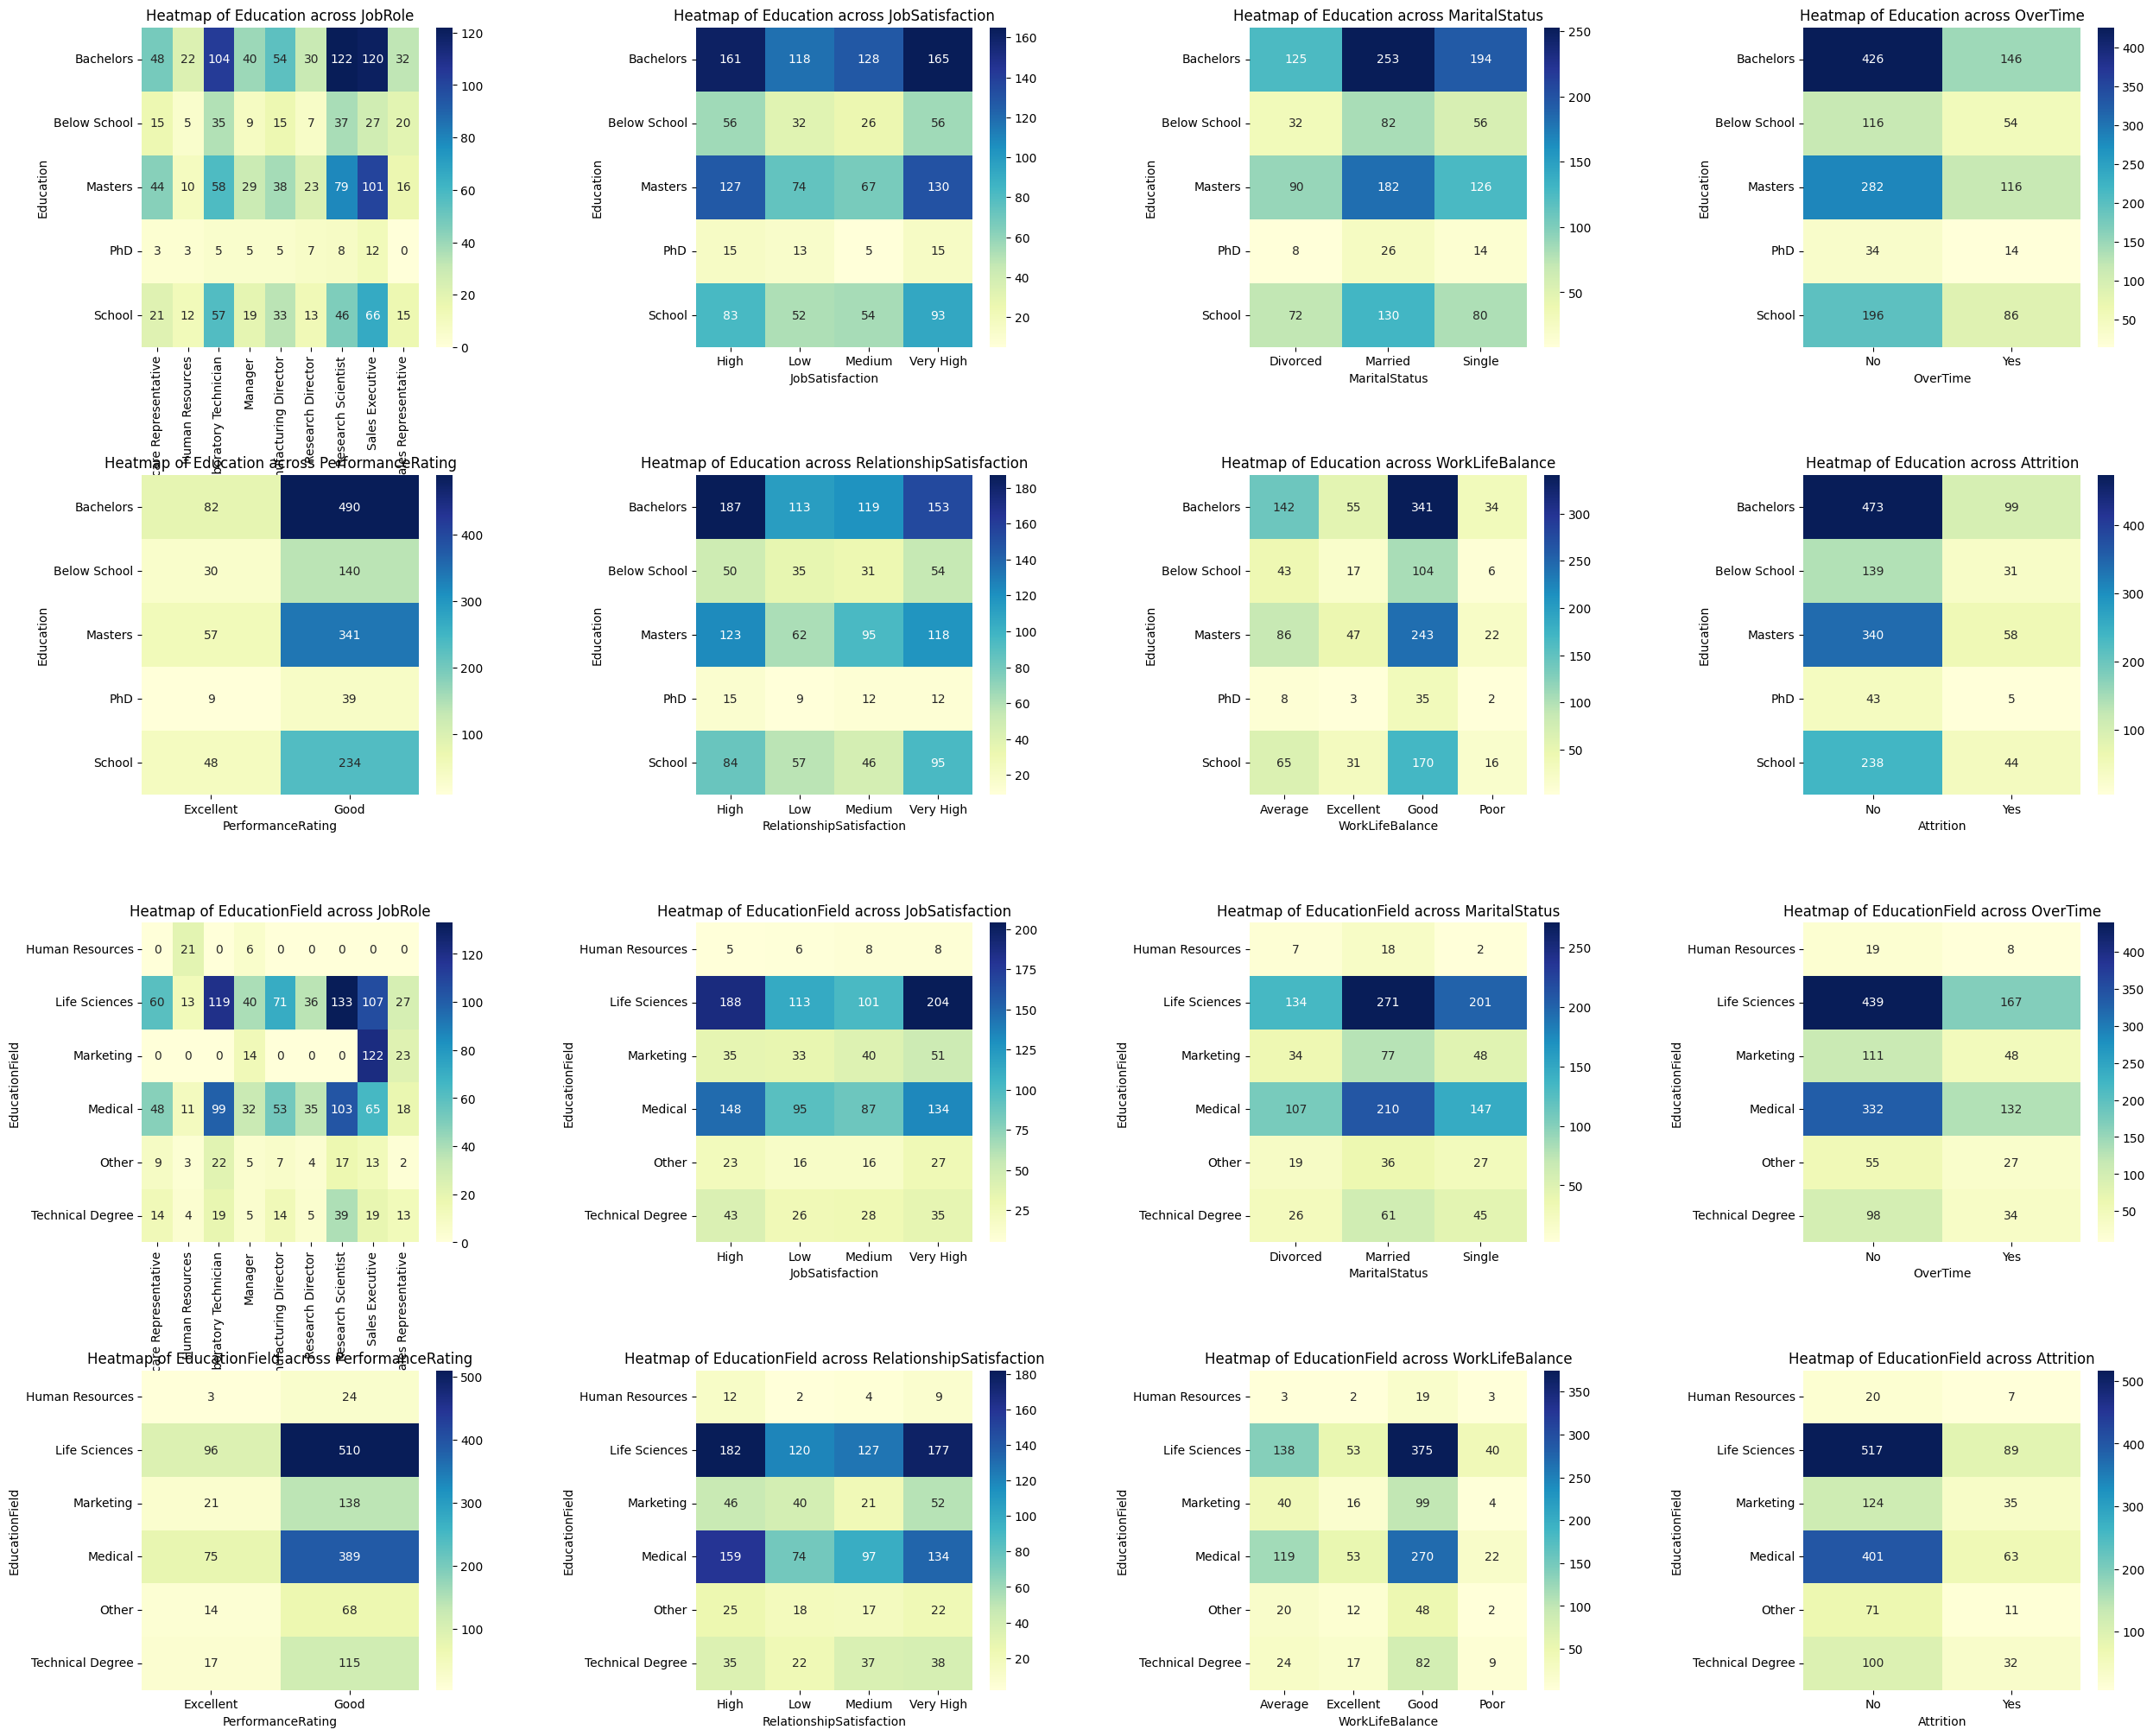

In [18]:
fig,axes = plt.subplots(4,4, figsize = (30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.6)
axes = axes.flatten()
k=0

for x_col, hue_col in product1[16:32]:
  ct = pd.crosstab(df[x_col],df[hue_col])
  sns.heatmap(ct, annot = True, cmap='YlGnBu', fmt='d', ax=axes[k])
  axes[k].set_title(f'Heatmap of {x_col} across {hue_col}')
  axes[k].set_ylabel(f'{x_col}')
  axes[k].set_xlabel(f'{hue_col}')

  k+=1

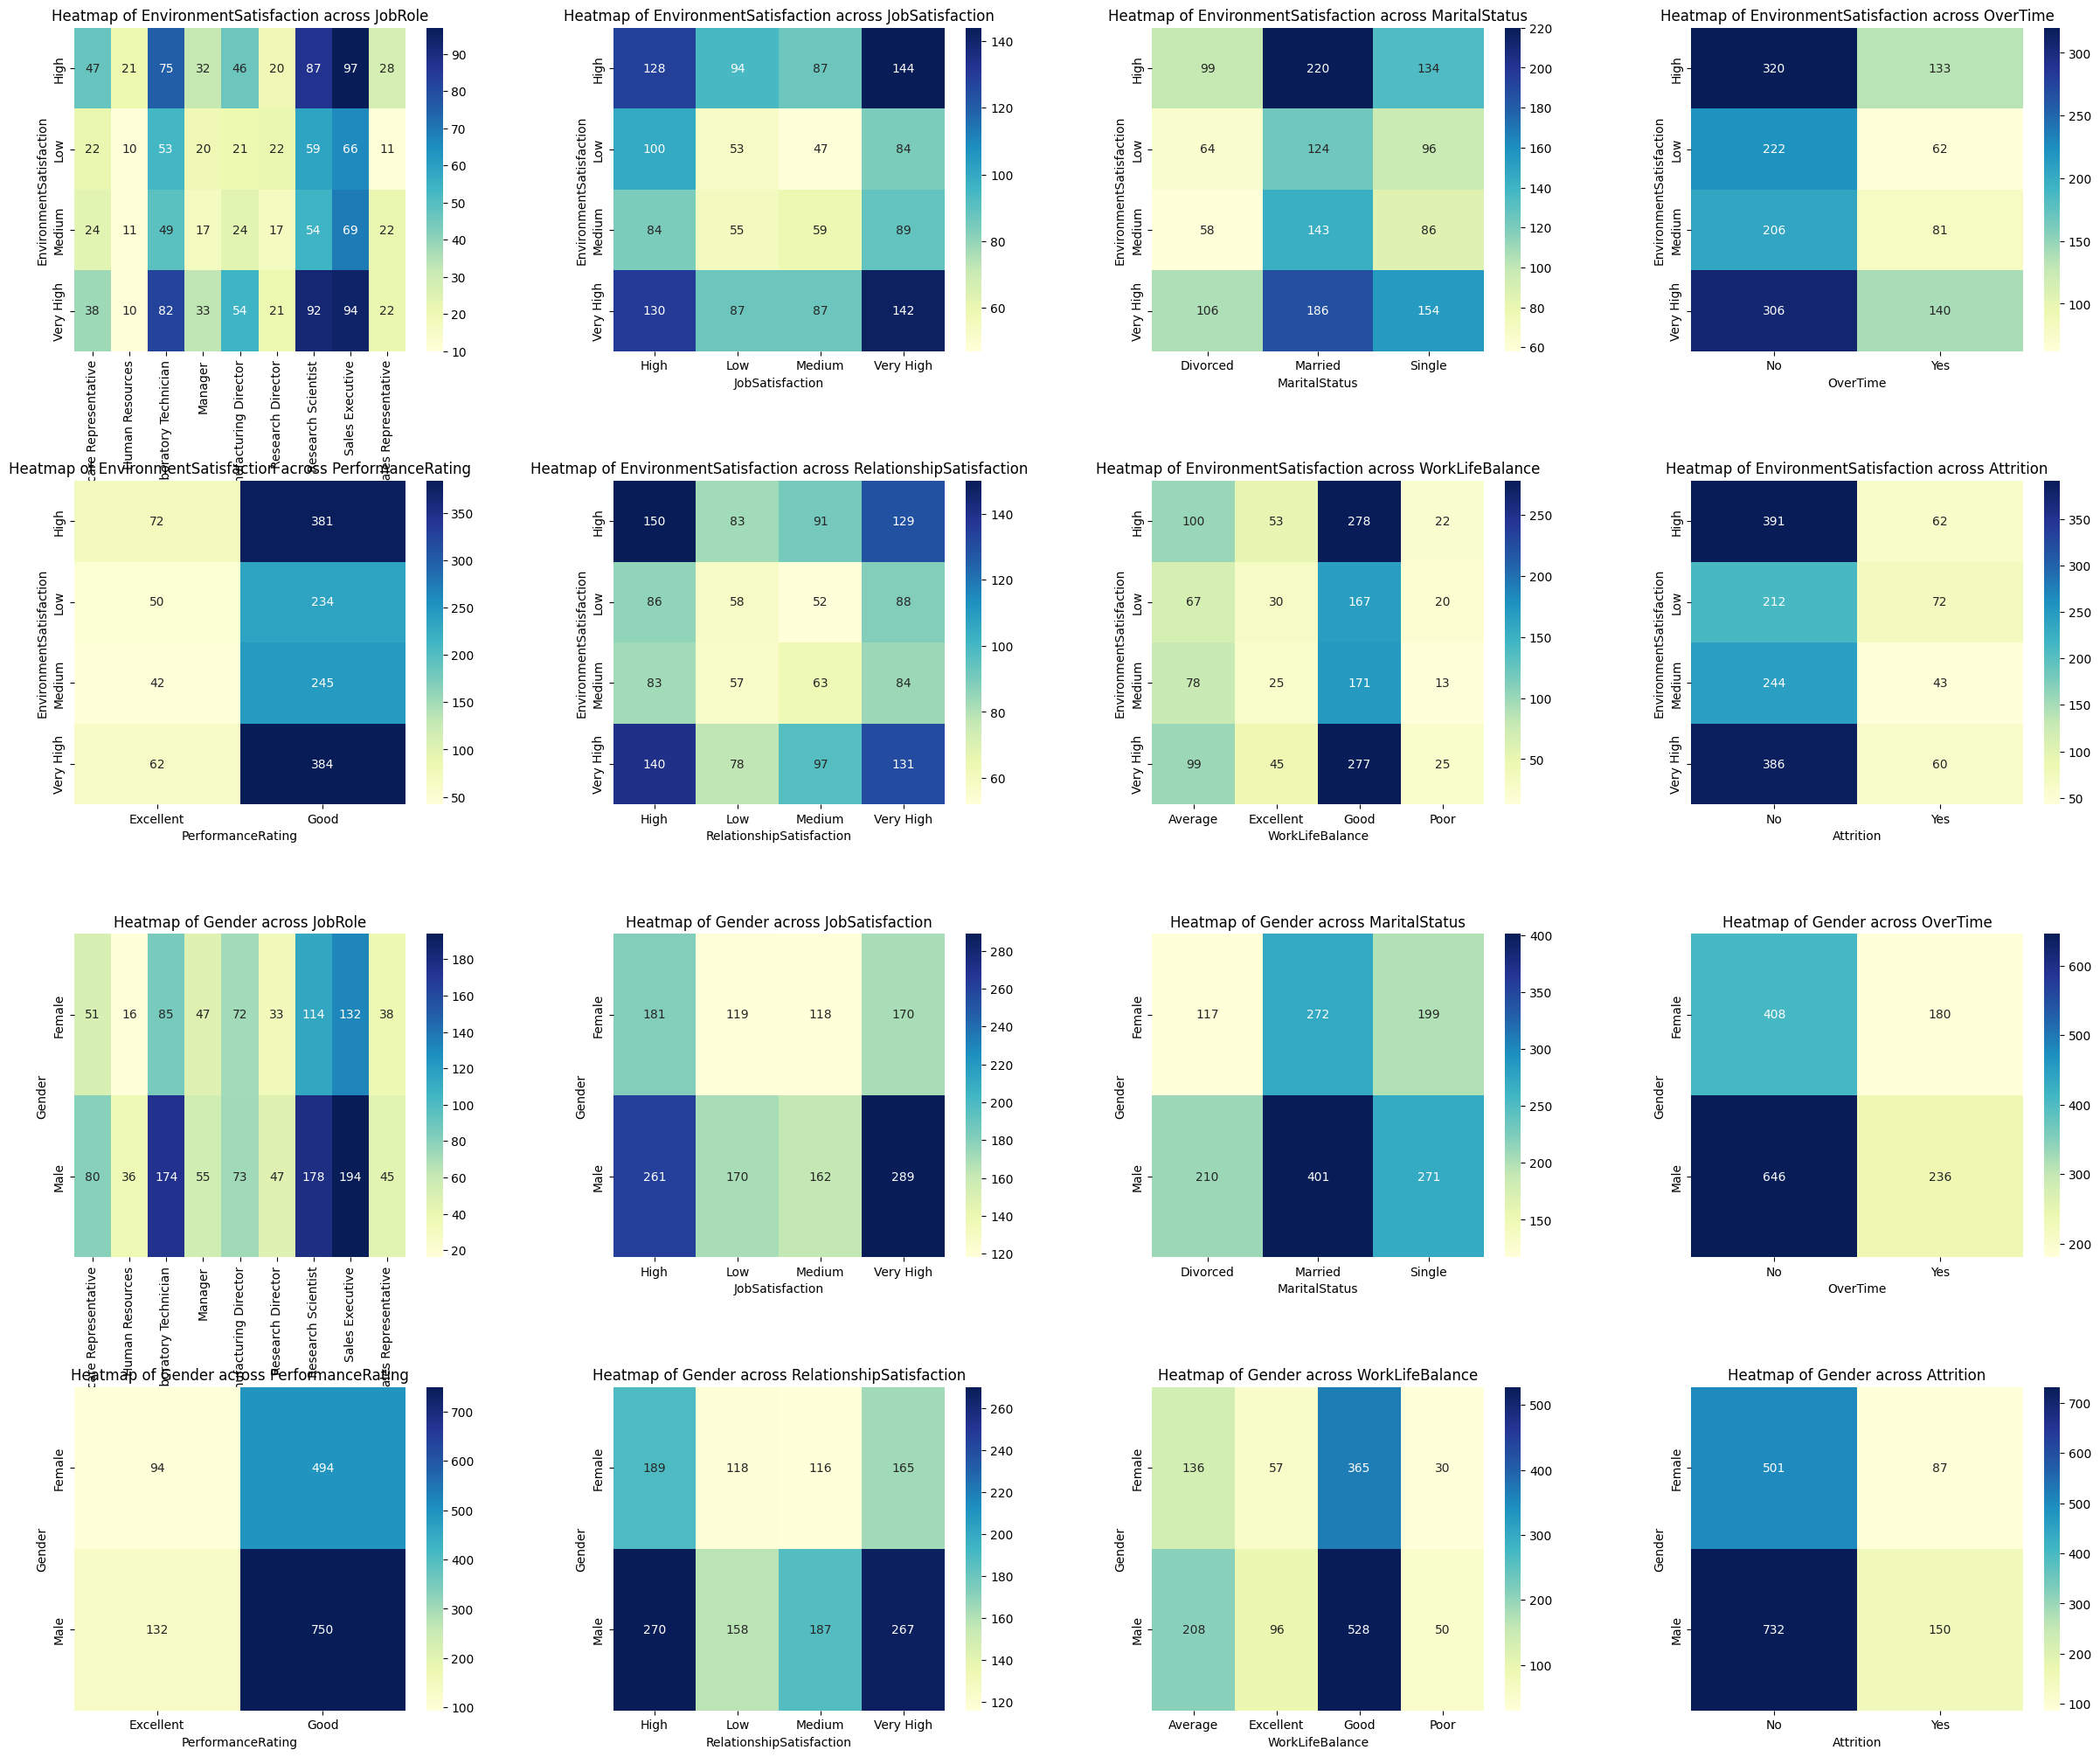

In [19]:
fig,axes = plt.subplots(4,4, figsize = (30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()
k=0

for x_col, hue_col in product1[32:48]:
  ct = pd.crosstab(df[x_col],df[hue_col])
  sns.heatmap(ct, annot = True, cmap='YlGnBu', fmt='d', ax=axes[k])
  axes[k].set_title(f'Heatmap of {x_col} across {hue_col}')
  axes[k].set_ylabel(f'{x_col}')
  axes[k].set_xlabel(f'{hue_col}')

  k+=1

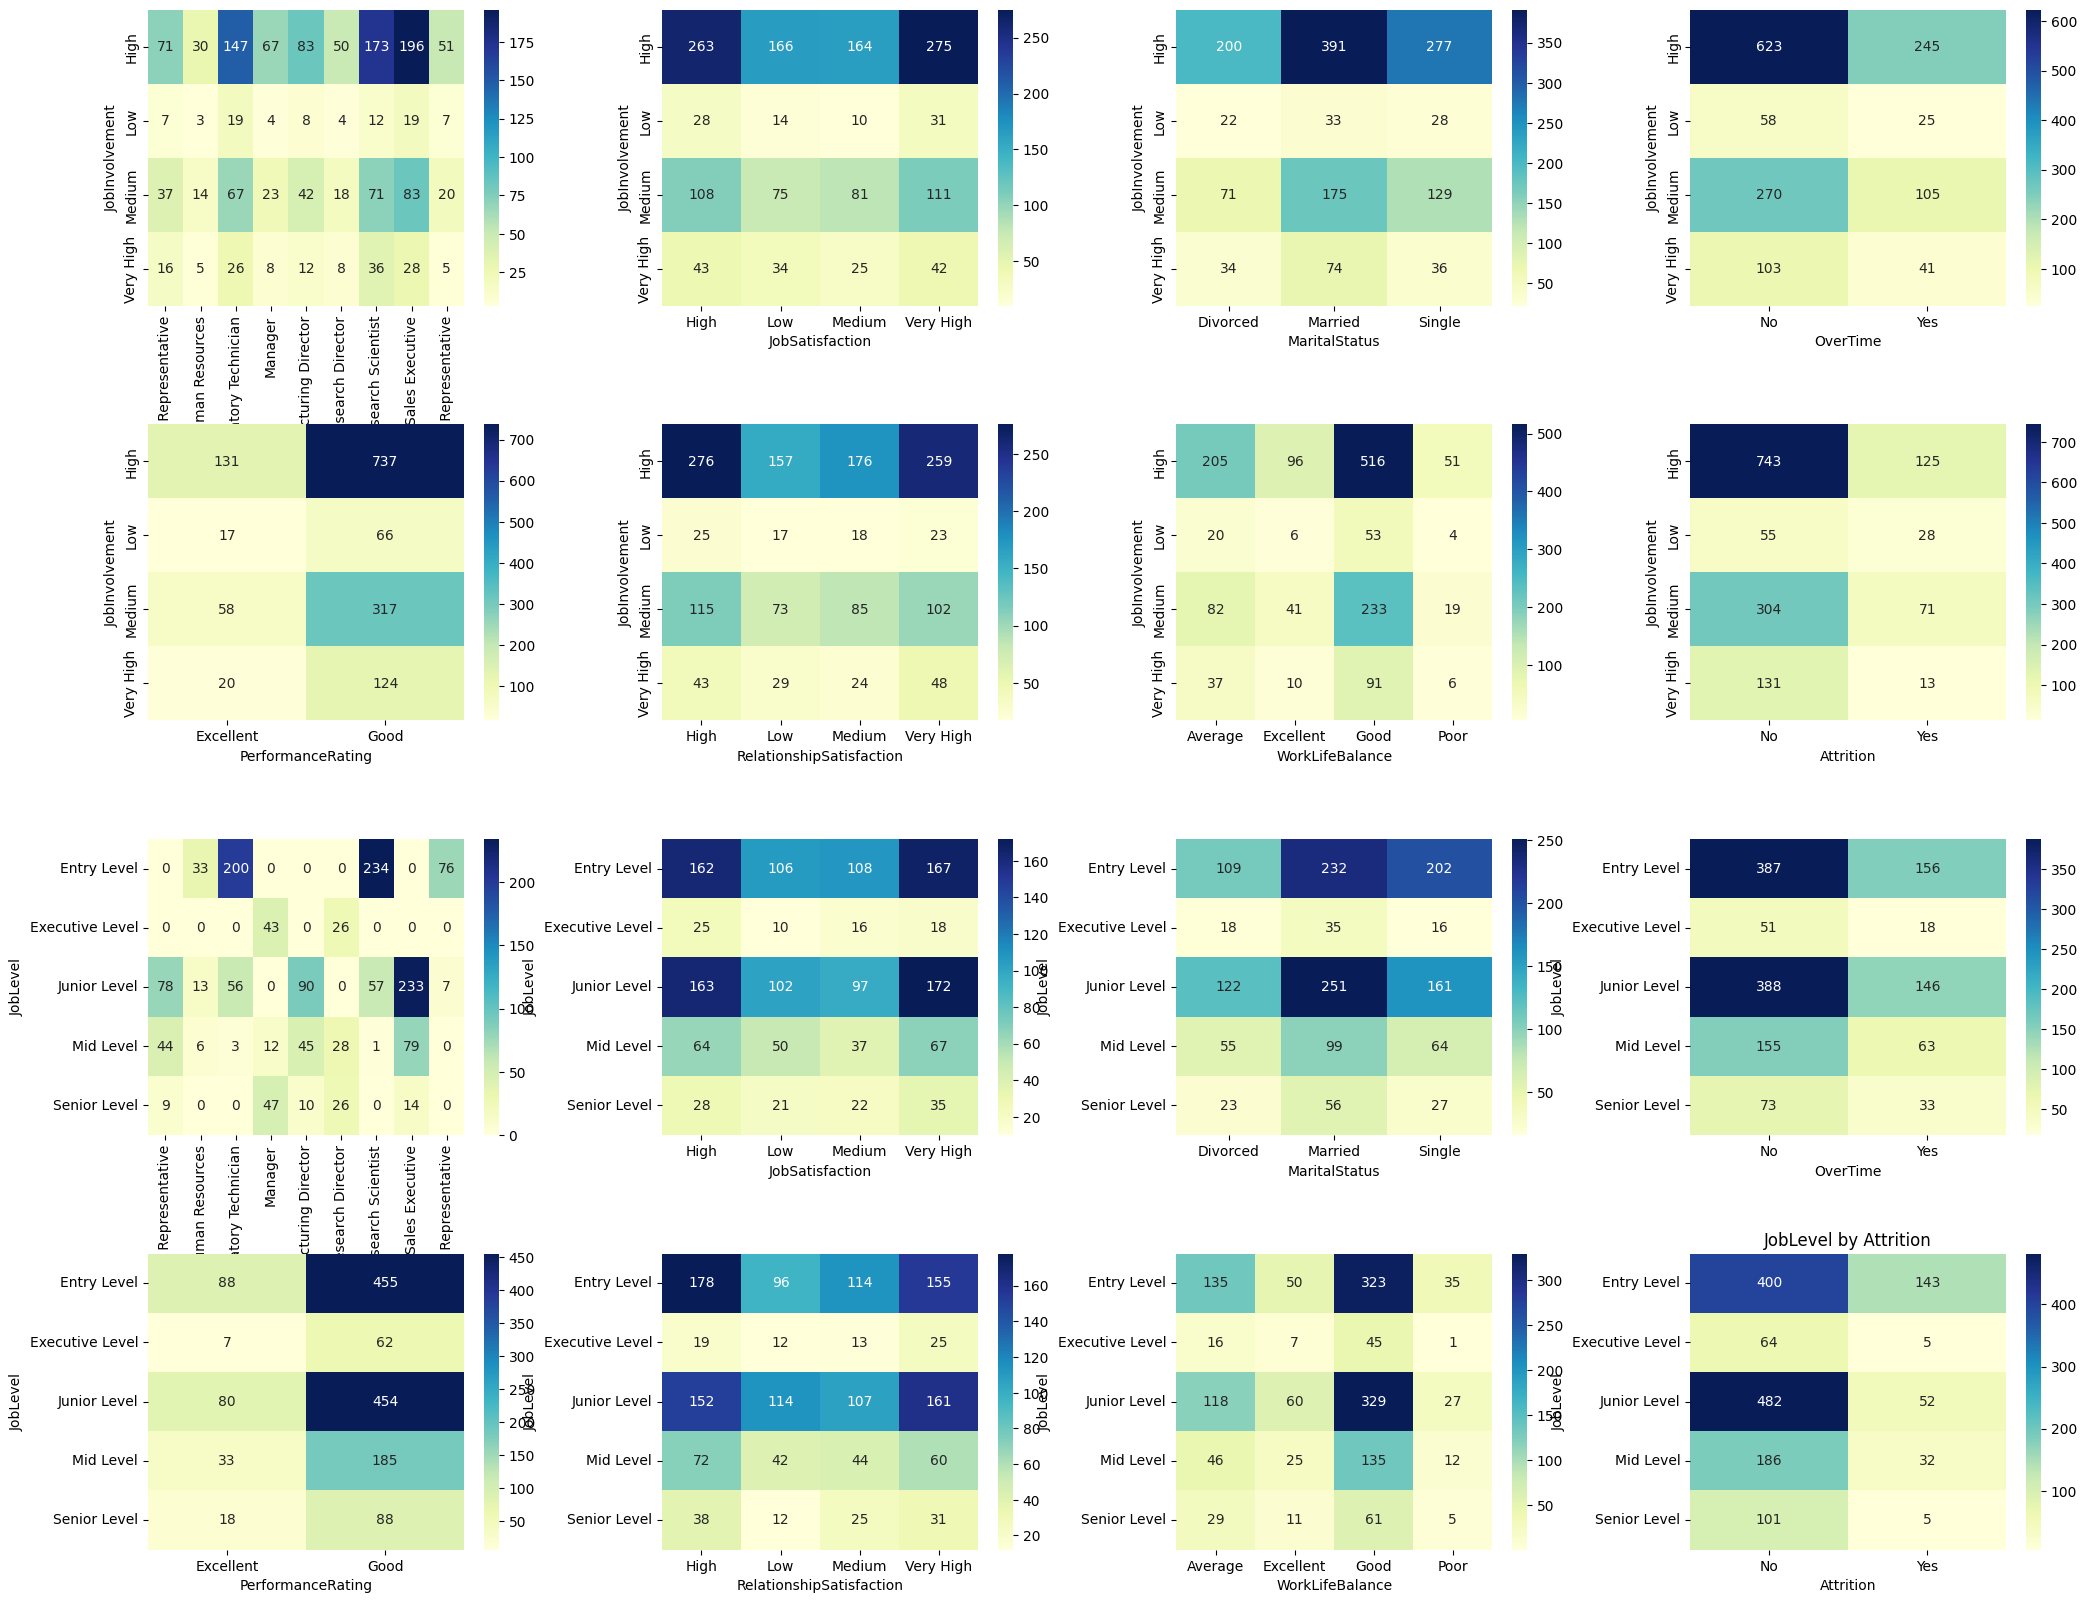

In [20]:
fig,axes = plt.subplots(4,4, figsize = (25,20))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()
k=0

for x_col, hue_col in product1[48:64]:
  ct = pd.crosstab(df[x_col],df[hue_col])
  sns.heatmap(ct, annot = True, cmap='YlGnBu', fmt='d', ax=axes[k])
  plt.title(f'{x_col} by {hue_col}')
  axes[k].set_ylabel(f'{x_col}')
  axes[k].set_xlabel(f'{hue_col}')

  k+=1

### Percentage Split of Employees who Attrited

Text(0.5, 1.0, 'Percentage Split of Employees across Attrition')

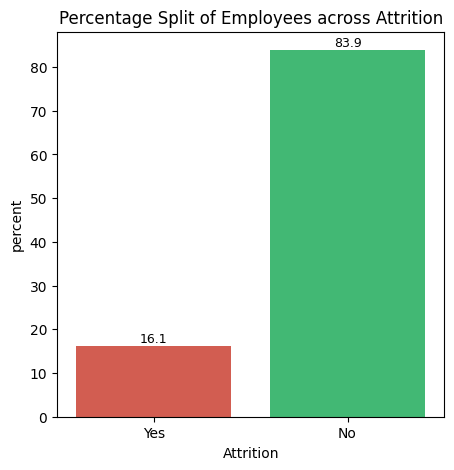

In [21]:
fig,axes = plt.subplots(1,1, figsize=(5,5))
custom_palette = {'Yes': '#E74C3C', 'No': '#2ECC71'}

sns.countplot(data = df, x='Attrition', stat = 'percent', palette =custom_palette)
for bar in axes.patches:
  height = bar.get_height()
  axes.text(bar.get_x() + bar.get_width() / 2, height + 0.8,
               f'{height:.1f}', ha='center', fontsize=9)
plt.title('Percentage Split of Employees across Attrition')

### Understanding key drivers of Attrition

In [22]:
cat_cols = categorical_cols1 + categorical_cols2
cat_cols.remove('Attrition')
cat_cols.remove('JobRole')
cat_cols

['Department',
 'BusinessTravel',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

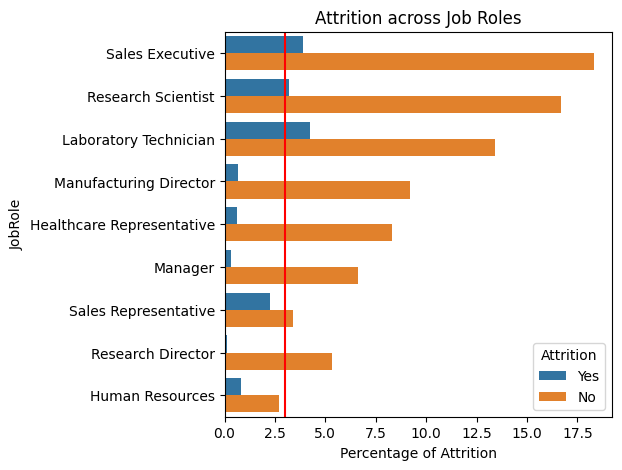

In [23]:
fig,axes = plt.subplots(1,1, figsize=(5,5))
sns.countplot(data=df, y= 'JobRole', hue= 'Attrition', stat = 'percent')
plt.title('Attrition across Job Roles')
plt.xlabel('Percentage of Attrition')
plt.axvline(3, color ='red')

Attrition is relatively high for Job Roles like Sales(both Sales Executive and Sales Representative, Research Scientist and Lab Technician



Text(0.5, 0.92, 'Attrition Across Organisational Dimensions')

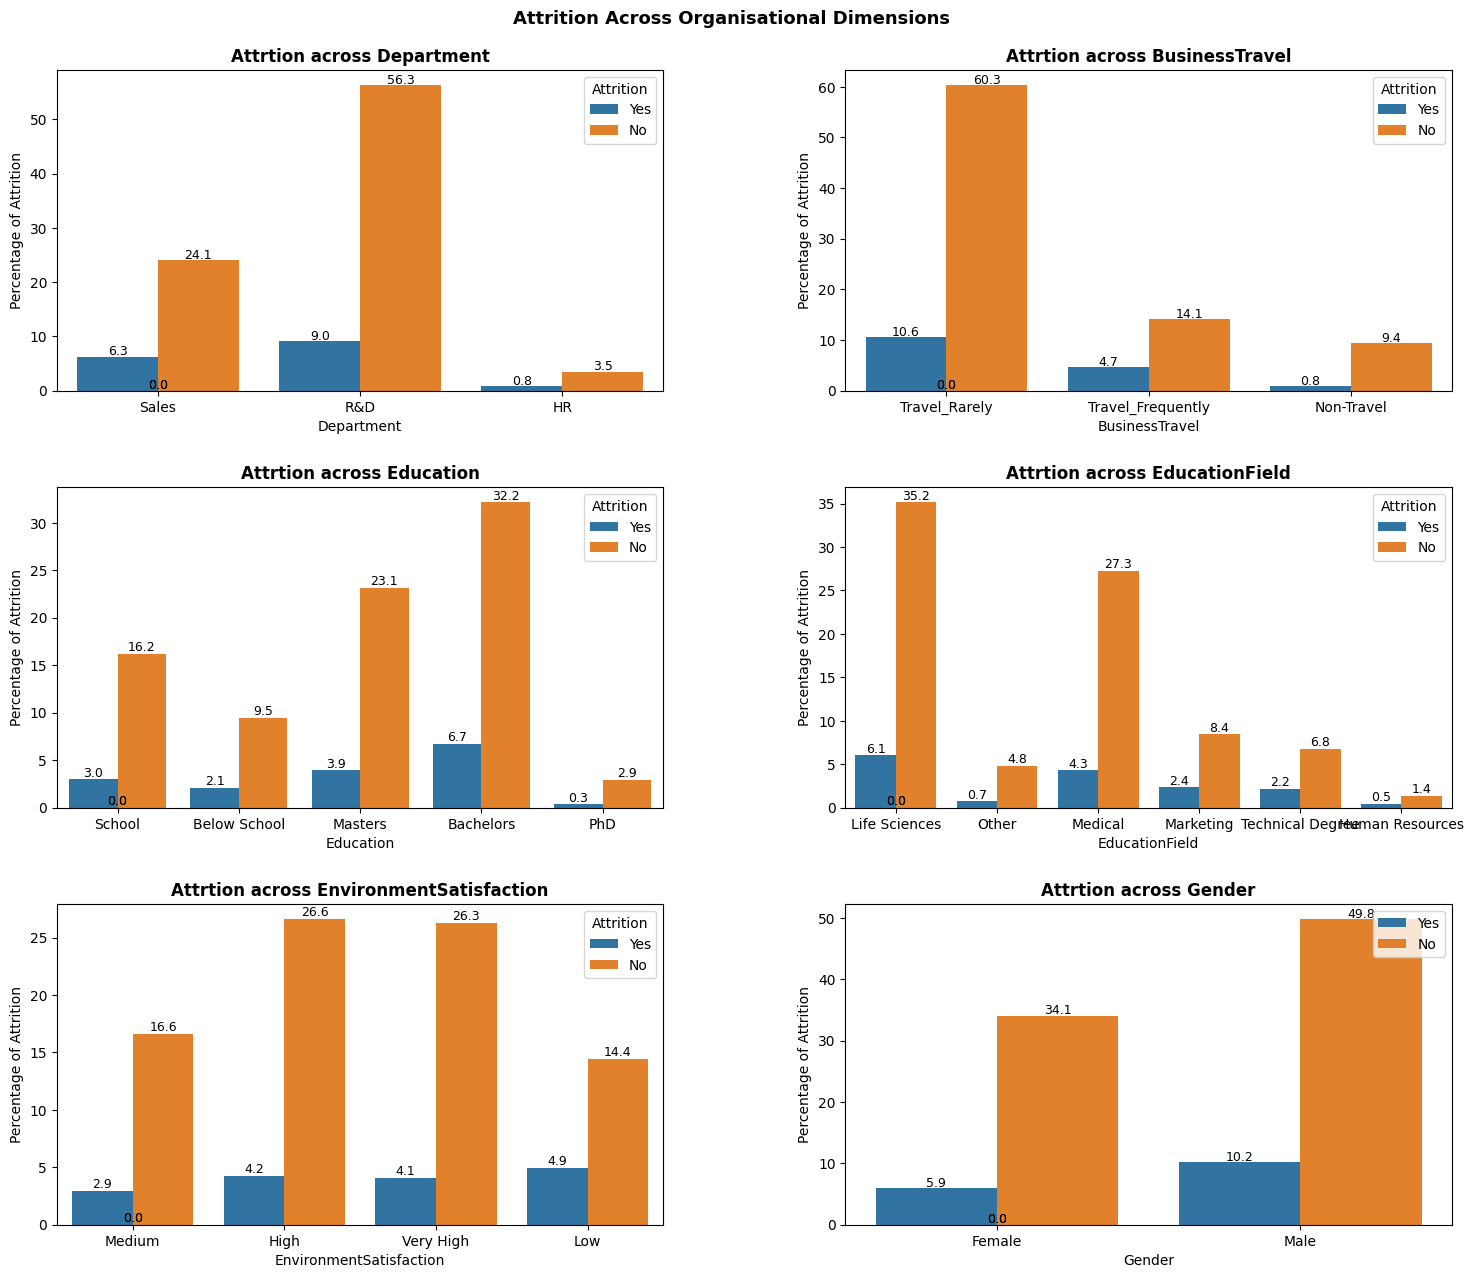

In [24]:
fig, axes = plt.subplots(3,2,figsize =(18,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
axes = axes.flatten()
k=0

for i in cat_cols[0:6]:
  sns.countplot(data=df, x= i, hue= 'Attrition', stat = 'percent', ax= axes[k])
  for bar in axes[k].patches:
    height = bar.get_height()
    axes[k].text(bar.get_x() + bar.get_width() / 2, height + 0.3,
                 f'{height:.1f}', ha='center', fontsize=9)
    axes[k].set_ylabel('Percentage of Attrition')
    axes[k].set_title(f'Attrtion across {i}', fontweight ='bold')
  k+=1

plt.legend(loc='upper right',bbox_to_anchor=(1, 1))
plt.suptitle('Attrition Across Organisational Dimensions', fontsize=13, fontweight='bold', y=0.92,x=0.5,va='top')

#### Employee Attrition Analysis: Key Insights

##### Overall Attrition Patterns

The data reveals significant variations in employee attrition rates across different organizational dimensions:

##### Department-Level Insights
- **R&D Department** shows the highest attrition risk with 56.3% of departures coming from non-attrition cases, but only 9.0% from actual attrition
- **Sales Department** has moderate attrition levels (6.3% attrition vs 24.1% non-attrition)
- **HR Department** shows the lowest attrition rates (0.8% attrition vs 3.5% non-attrition)

##### Business Travel Impact
- **Frequent travelers** show higher attrition rates (4.7% attrition vs 14.1% non-attrition)
- **Rare travelers** have the highest overall representation (10.6% attrition vs 60.3% non-attrition)
- **Non-travelers** show minimal attrition (0.8% vs 9.4%)

##### Education Level Correlations
- **PhD holders** have the lowest attrition rates (0.3% attrition vs 2.9% non-attrition)
- **Bachelor's degree holders** show moderate attrition (6.7% vs 32.2%)
- **Below college education** demonstrates varied patterns across different levels

##### Field of Study Impact
- **Life Sciences** employees show higher attrition rates (6.1% vs 35.2%)
- **Medical field** employees have lower attrition (4.3% vs 27.3%)
- **Technical degrees** show minimal attrition (2.2% vs 6.8%)

##### Environment Satisfaction Relationship
- **Very High satisfaction** employees still show significant non-attrition representation (26.3%)
- **High satisfaction** correlates with lower attrition rates (4.2% vs 26.6%)
- **Medium satisfaction** shows the lowest attrition (2.9% vs 16.6%)

##### Gender Distribution
- **Male employees** represent the majority of both attrition (10.2%) and non-attrition (49.8%) cases
- **Female employees** show lower overall attrition rates (5.9% vs 34.1%)

##### Strategic Recommendations
1. **Focus on R&D retention** strategies given the department's high representation
2. **Address travel-related stress** for frequent business travelers
3. **Leverage satisfaction data** to identify at-risk employee segments
4. **Consider gender-specific retention** approaches based on observed patterns

Text(0.5, 0.92, 'Attrition Across Organisational Dimensions')

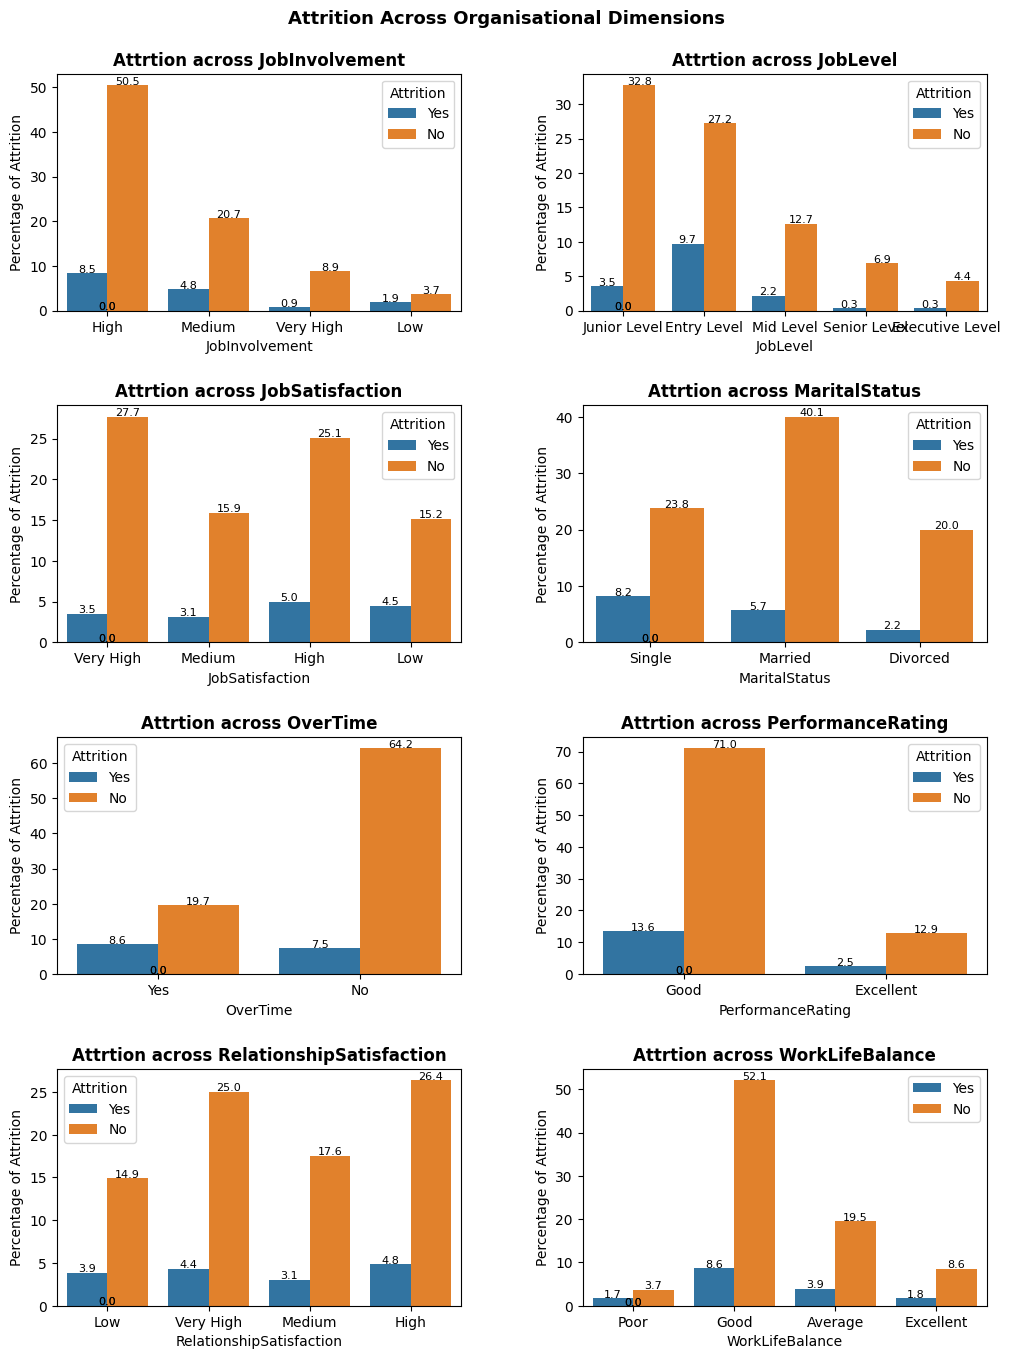

In [25]:
fig, axes = plt.subplots(4,2,figsize =(12, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

axes = axes.flatten()
k=0

for i in cat_cols[6:]:
  sns.countplot(data=df, x= i, hue= 'Attrition', stat = 'percent', ax= axes[k])
  for bar in axes[k].patches:
    height = bar.get_height()
    axes[k].text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                 f'{height:.1f}', ha='center', fontsize=8)
    axes[k].set_ylabel('Percentage of Attrition')
    axes[k].set_title(f'Attrtion across {i}',fontweight='bold')
  k+=1

plt.legend(loc='upper right',bbox_to_anchor=(1, 1))
plt.suptitle('Attrition Across Organisational Dimensions', fontsize=13, fontweight='bold', y=0.92,x=0.5,va='top' )

#### Employee Attrition Analysis: Key Insights

##### Job Involvement Patterns
- **High involvement** employees show higher attrition rates (8.5% vs 50.5% non-attrition)
- **Medium involvement** demonstrates moderate attrition (4.8% vs 20.7%)
- **Very high involvement** shows surprisingly low attrition (0.9% vs 8.9%)
- **Low involvement** has minimal representation (1.9% vs 3.7%)

##### Job Level Hierarchy Impact
- **Entry Level** positions show the highest attrition risk (9.7% attrition vs 27.2% non-attrition)
- **Junior Level** employees have moderate attrition (3.5% vs 32.8%)
- **Mid Level** shows declining attrition (2.2% vs 12.7%)
- **Senior Level** has minimal attrition (0.1% vs 6.9%)
- **Executive Level** demonstrates lowest attrition (0.3% vs 4.4%)

##### Job Satisfaction Correlation
- **Low satisfaction** employees show highest attrition rates (4.5% vs 15.2%)
- **High satisfaction** has significant attrition (5.0% vs 25.1%)
- **Medium satisfaction** shows moderate levels (3.1% vs 15.9%)
- **Very high satisfaction** paradoxically shows some attrition (3.5% vs 27.7%)

##### Marital Status Influence
- **Single employees** represent the highest attrition group (8.2% vs 23.8%)
- **Married employees** show moderate attrition (5.7% vs 40.7%)
- **Divorced employees** have lower attrition rates (2.2% vs 20.0%)

##### Overtime Impact
- **Employees working overtime** show significantly higher attrition (8.6% vs 19.7%)
- **No overtime workers** demonstrate much lower attrition (7.5% vs 64.2%)

##### Performance Rating Effects
- **Good performers** show higher attrition (13.6% vs 71.0%)
- **Excellent performers** have lower attrition rates (2.5% vs 12.9%)
- Performance ratings appear inversely correlated with attrition likelihood

##### Relationship Satisfaction
- **High relationship satisfaction** shows notable attrition (4.8% vs 26.4%)
- **Very high satisfaction** demonstrates moderate attrition (4.4% vs 25.0%)
- **Medium satisfaction** has lower attrition (3.1% vs 17.6%)
- **Low satisfaction** shows highest attrition relative to group size (3.9% vs 14.9%)

##### Work-Life Balance Impact
- **Good work-life balance** employees show highest attrition (8.6% vs 52.1%)
- **Poor work-life balance** has minimal representation (1.7% vs 3.7%)
- **Average balance** shows moderate attrition (3.9% vs 19.5%)
- **Excellent balance** demonstrates lower attrition (1.8% vs 8.6%)

##### Strategic Insights
1. **Entry-level retention** requires immediate attention given high attrition rates
2. **Overtime management** is crucial - overtime strongly correlates with attrition
3. **Performance-attrition paradox** suggests good performers may be leaving for better opportunities
4. **Work-life balance** initiatives may help retain employees with good current balance
5. **Single employee support** programs could address this high-risk demographic

In [26]:
continuous_cols = ['Age','MonthlyIncome','MonthlyRate','HourlyRate','TotalWorkingYears','YearsAtCompany',
                   'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PercentSalaryHike','DailyRate',
                   'DistanceFromHome','StockOptionLevel']

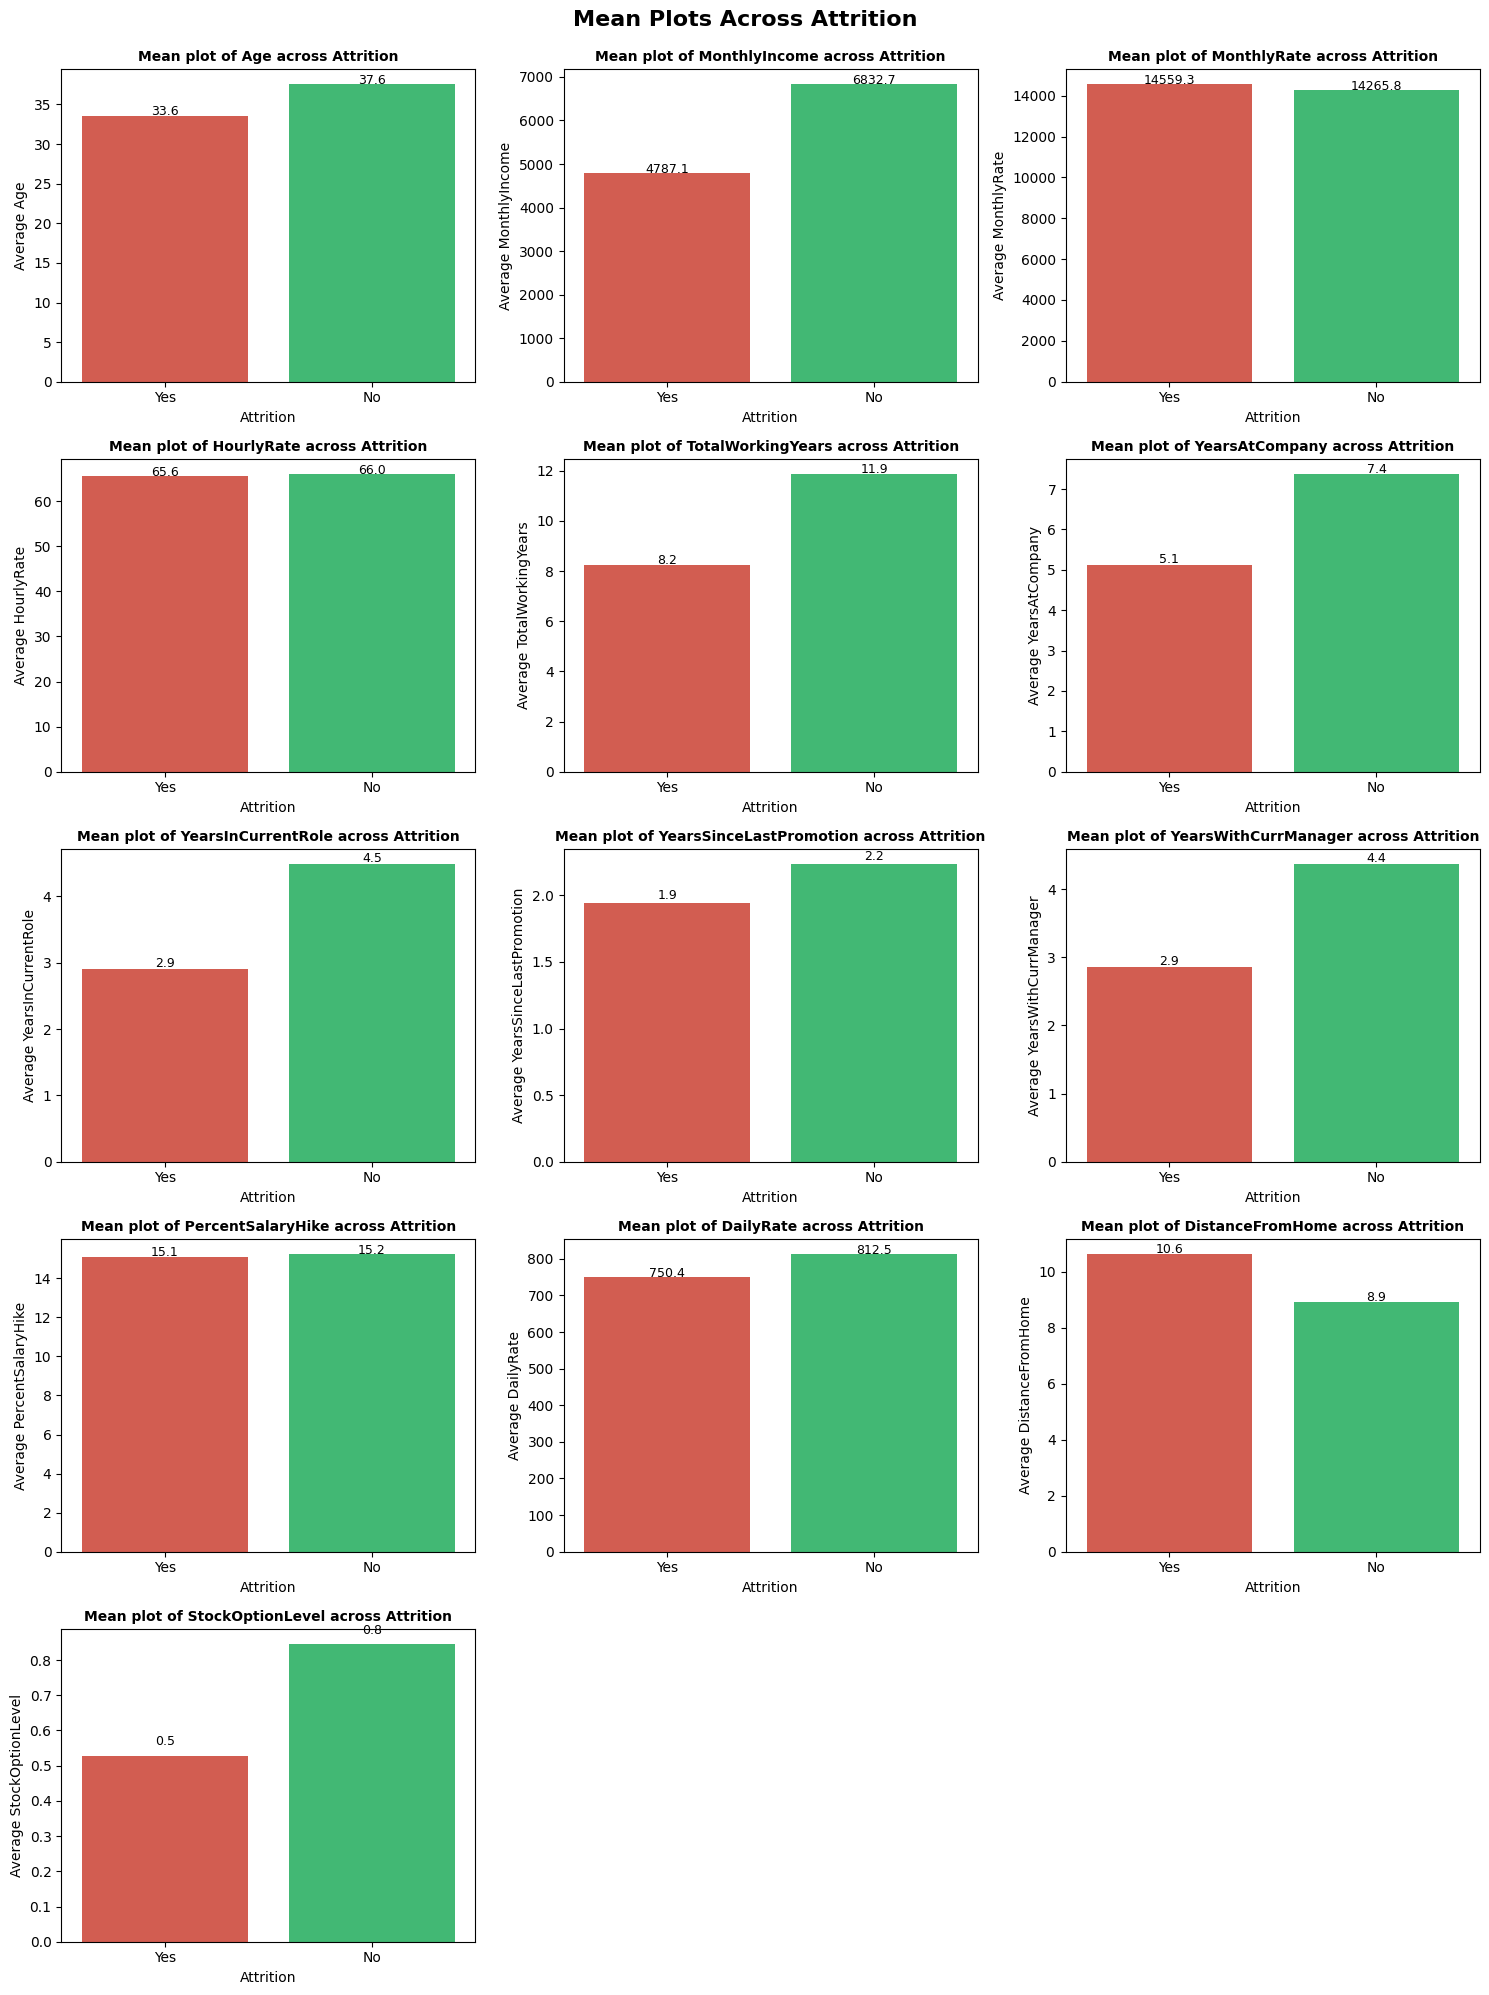

In [27]:
fig, axes = plt.subplots(5,3,figsize =(15,20))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

custom_palette = {'Yes': '#E74C3C', 'No': '#2ECC71'}

axes = axes.flatten()
k=0

for i in continuous_cols:
  sns.barplot(data = df, x= 'Attrition', y= i, ax=axes[k], errorbar =None, palette=custom_palette)
  for bar in axes[k].patches:
    height = bar.get_height()
    axes[k].text(bar.get_x() + bar.get_width() / 2, height + 0.03,
                f'{height:.1f}', ha='center', fontsize=9)

  axes[k].set_title(f'Mean plot of {i} across Attrition',fontsize = 10,fontweight='bold')
  axes[k].set_ylabel(f'Average {i}')
  k+=1
axes[13].axis('off')
axes[14].axis('off')

plt.suptitle('Mean Plots Across Attrition', fontsize=16, fontweight='bold', y=0.995,x=0.5,va='top' )
plt.tight_layout()
plt.show()

#### Employee Attrition Analysis: Quantitative Insights

##### Demographic & Compensation Patterns

###### Age Distribution
- **Employees who left**: Average age of 33.6 years
- **Employees who stayed**: Average age of 37.6 years
- **Insight**: Younger employees show higher attrition tendency (4-year difference)

###### Compensation Analysis
- **Monthly Income**:
 - Departed employees: 4,787 dollars average
 - Retained employees: 6,833 dollars average
 - **Gap**: 2,046 dollars difference suggests compensation plays a significant role

- **Monthly Rate**:
 - Departed: 14,539 dollars average
 - Retained: 14,406 dollars average
 - **Insight**: Minimal difference indicates rate structure isn't the primary factor

- **Hourly Rate**:
 - Departed: 65.6 dollars average
 - Retained: 66.6 dollars average
 - **Insight**: Negligible difference in hourly compensation

##### Career Progression Indicators

###### Experience & Tenure
- **Total Working Years**:
 - Departed: 8.2 years average experience
 - Retained: 11.3 years average experience
 - **Insight**: Less experienced employees more likely to leave

- **Years at Company**:
 - Departed: 5.1 years average tenure
 - Retained: 7.4 years average tenure
 - **Insight**: Shorter tenure correlates with higher attrition risk

- **Years in Current Role**:
 - Departed: 2.9 years average
 - Retained: 4.3 years average
 - **Insight**: Role stability linked to retention

###### Promotion & Management
- **Years Since Last Promotion**:
 - Departed: 1.9 years average
 - Retained: 2.2 years average
 - **Insight**: Recent promotion timing shows minimal impact

- **Years with Current Manager**:
 - Departed: 2.9 years average
 - Retained: 4.4 years average
 - **Insight**: Longer manager relationships correlate with retention

##### Performance & Work Conditions

###### Salary Progression
- **Percent Salary Hike**:
 - Departed: 15.2% average
 - Retained: 15.2% average
 - **Insight**: Salary increases don't differentiate attrition risk

###### Work Schedule & Location
- **Daily Rate**:
 - Departed: $804 average
 - Retained: $813 average
 - **Insight**: Minimal difference in daily compensation

- **Distance from Home**:
 - Departed: 10.6 average distance
 - Retained: 8.9 average distance
 - **Insight**: Longer commutes associated with higher attrition

###### Stock Options
- **Stock Option Level**:
 - Departed: 0.5 average level
 - Retained: 0.8 average level
 - **Insight**: Higher stock option levels correlate with retention

##### Key Risk Factors Identified

###### High Risk Indicators
1. **Lower monthly income** (-$2,046 difference)
2. **Younger age** (4-year difference)
3. **Less total experience** (3.1-year difference)
4. **Shorter company tenure** (2.3-year difference)
5. **Longer commute distance** (+1.7 difference)
6. **Lower stock option levels** (0.3-point difference)

###### Moderate Risk Indicators
1. **Shorter time in current role** (1.4-year difference)
2. **Less time with current manager** (1.5-year difference)

###### Non-Differentiating Factors
1. **Salary hike percentages** (identical averages)
2. **Hourly rates** (minimal difference)
3. **Monthly rates** (minimal difference)
4. **Daily rates** (minimal difference)

##### Strategic Recommendations

###### Immediate Actions
1. **Compensation review** - Address $2,046 income gap for at-risk employees
2. **Early career support** - Focus on employees with <8 years experience
3. **Remote work options** - Reduce commute burden for distant employees

###### Medium-term Initiatives
1. **Tenure-based retention programs** - Target employees with <5 years company tenure
2. **Manager relationship building** - Strengthen long-term manager-employee bonds
3. **Stock option optimization** - Enhance equity participation for retention

###### Long-term Strategies
1. **Career pathway clarity** - Reduce role stagnation for 2-3 year tenures
2. **Age-inclusive culture** - Create engagement programs for younger workforce
3. **Compensation benchmarking** - Ensure competitive total compensation packages

### Distribution Plots of Continuous Variables

Text(0.5, 0.92, 'Distribution of Continous Variables')

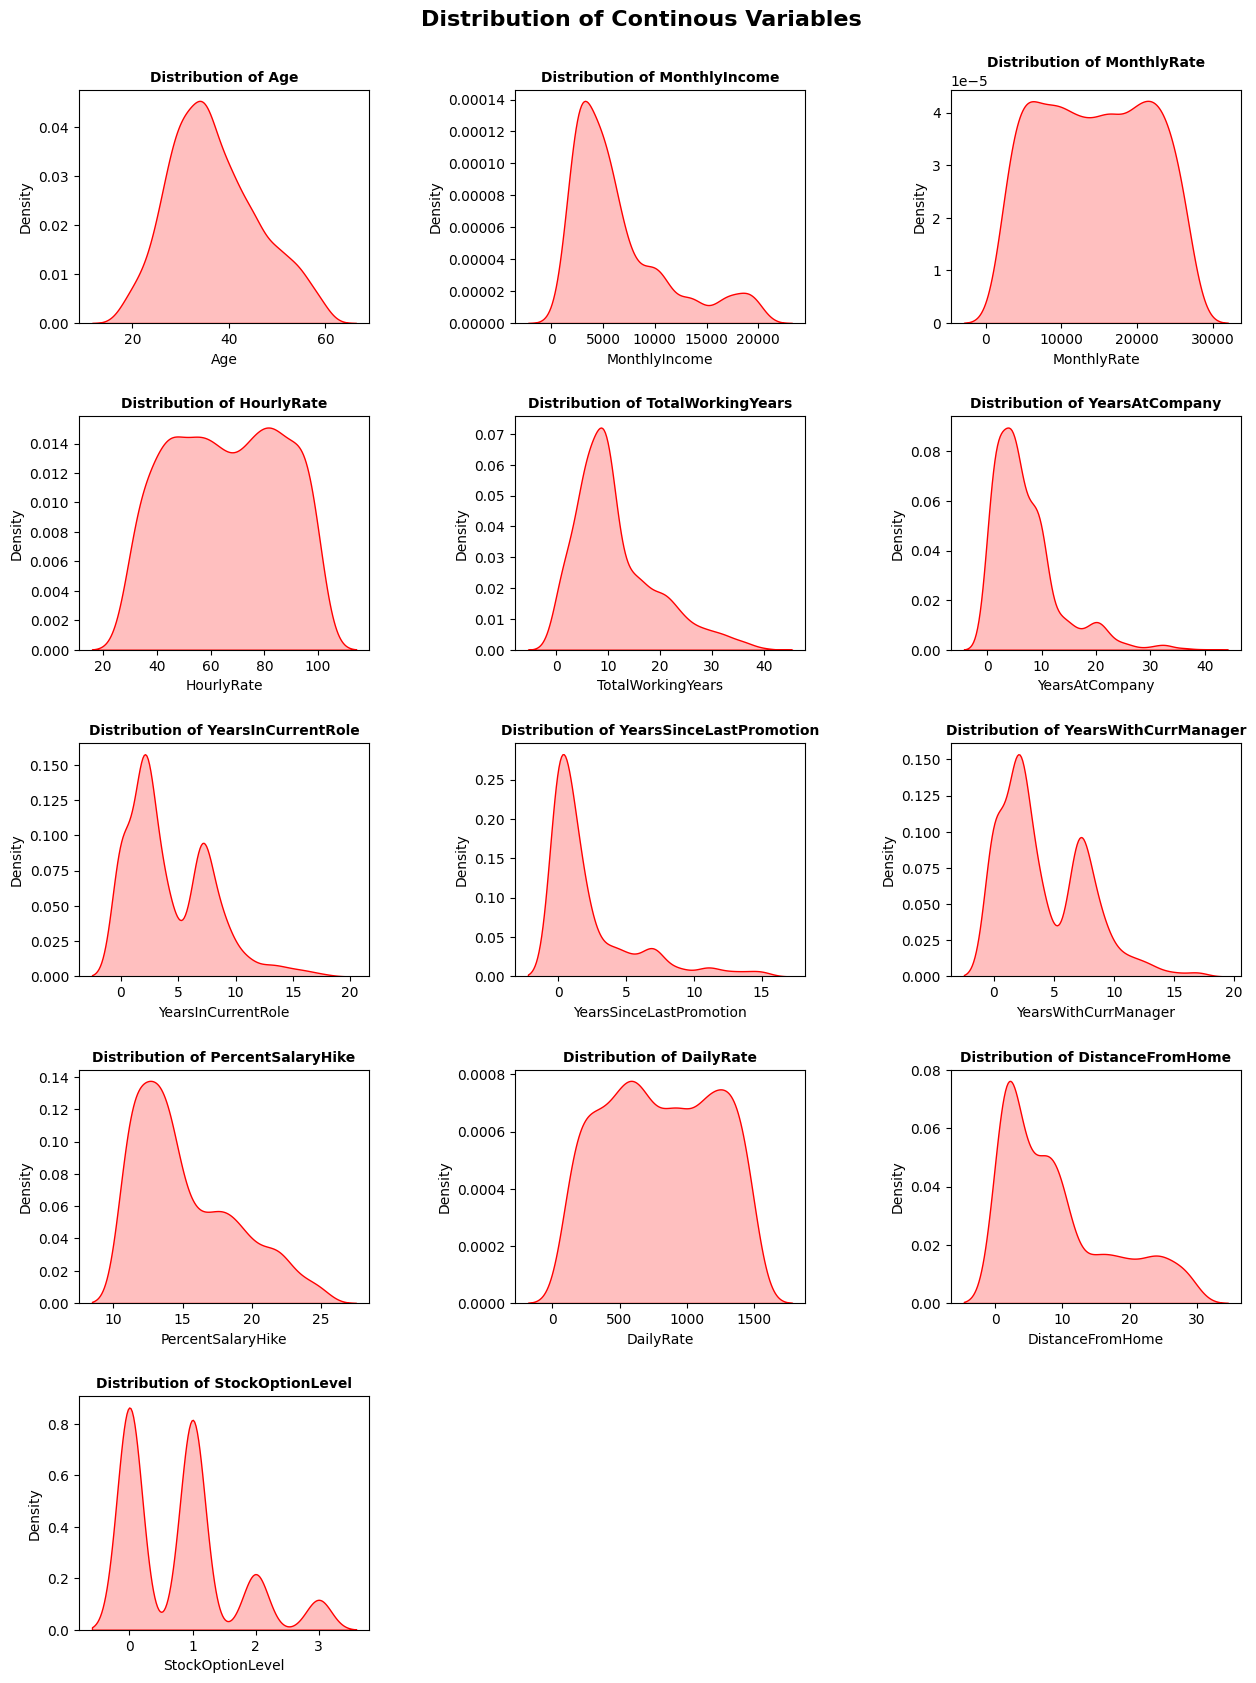

In [28]:
fig, axes = plt.subplots(5,3, figsize =(15,20))
axes = axes.flatten()

fig.subplots_adjust(hspace=0.4, wspace=0.5)
k=0

for i in continuous_cols:
  sns.kdeplot(data = df, x= i, fill=True, ax = axes[k], color ='red')
  axes[k].set_title(f'Distribution of {i}', fontsize = 10, fontweight ='bold')
  k+=1

axes[13].axis('off')
axes[14].axis('off')
plt.suptitle('Distribution of Continous Variables', fontsize = 16, fontweight ='bold', y=0.92, x=0.5, va ='top')

###Distribution of Continuous Variables across Attrition

#### 📊 Insights from Employee Attributes Distribution

##### 🔍 Overview
The image presents the **distribution plots of various continuous variables** related to employee demographics, compensation, tenure, and performance. These plots help identify patterns, anomalies, and central tendencies across employee data.

---

#### 🧠 Variable-Level Insights

##### 1. **Age**
- Unimodal distribution centered around **35 years**.
- Most employees are between **25 and 60**.

##### 2. **Monthly Income**
- **Right-skewed** with most employees earning between **0 and 10,000** units.
- A few high earners create a long tail.

##### 3. **Monthly Rate**
- Fairly **uniform distribution** with a gentle peak around **10,000–15,000**.

##### 4. **Hourly Rate**
- **Bimodal** distribution peaking around **40 and 80**.
- Common rates lie between **20 and 100**.

##### 5. **Total Working Years**
- **Right-skewed**; most employees have **<20 years** of experience.
- Peak around **10 years**, suggesting a relatively young workforce.

##### 6. **Years at Company**
- Peaks at around **5 years**, with most having **<10 years** tenure.

##### 7. **Years in Current Role**
- **Bimodal** with clusters around **2 and 7 years**.
- Indicates a mix of newer and seasoned employees in roles.

##### 8. **Years Since Last Promotion**
- Strong peak at **0 years**, suggesting many were promoted recently or not at all.
- Most have **<5 years** since last promotion.

##### 9. **Years with Current Manager**
- Similar bimodal trend to current role, with peaks at **2 and 7 years**.
- Reflects management continuity or role transitions.

##### 10. **Percent Salary Hike**
- **Unimodal** with peak around **15%**.
- Majority hikes fall between **10–20%**.

##### 11. **Daily Rate**
- Uniform distribution with visible concentrations around **500 and 1000** units.

##### 12. **Distance From Home**
- **Right-skewed**, peaking around **1–2 miles**.
- Most employees live **<10 miles** from the workplace.

##### 13. **Stock Option Level**
- **Bimodal** with dominant levels at **0 and 1**.
- Few employees hold higher-level stock options.

---

#### 🧩 Takeaways for Further Analysis
- **Promotion frequency** and **manager tenure** may offer clues about career growth or stagnation.
- **Income variables** show expected skew toward lower ranges, good candidates for **log transformation** in modeling.
- **Bimodal patterns** (Hourly Rate, Years in Role) could indicate **distinct employee groups** worth segmenting.

Let me know if you'd like to visualize any of these patterns further or connect them to attrition trends, Chayan!

/tmp/ipython-input-29-2363449862.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right',bbox_to_anchor=(1, 1))


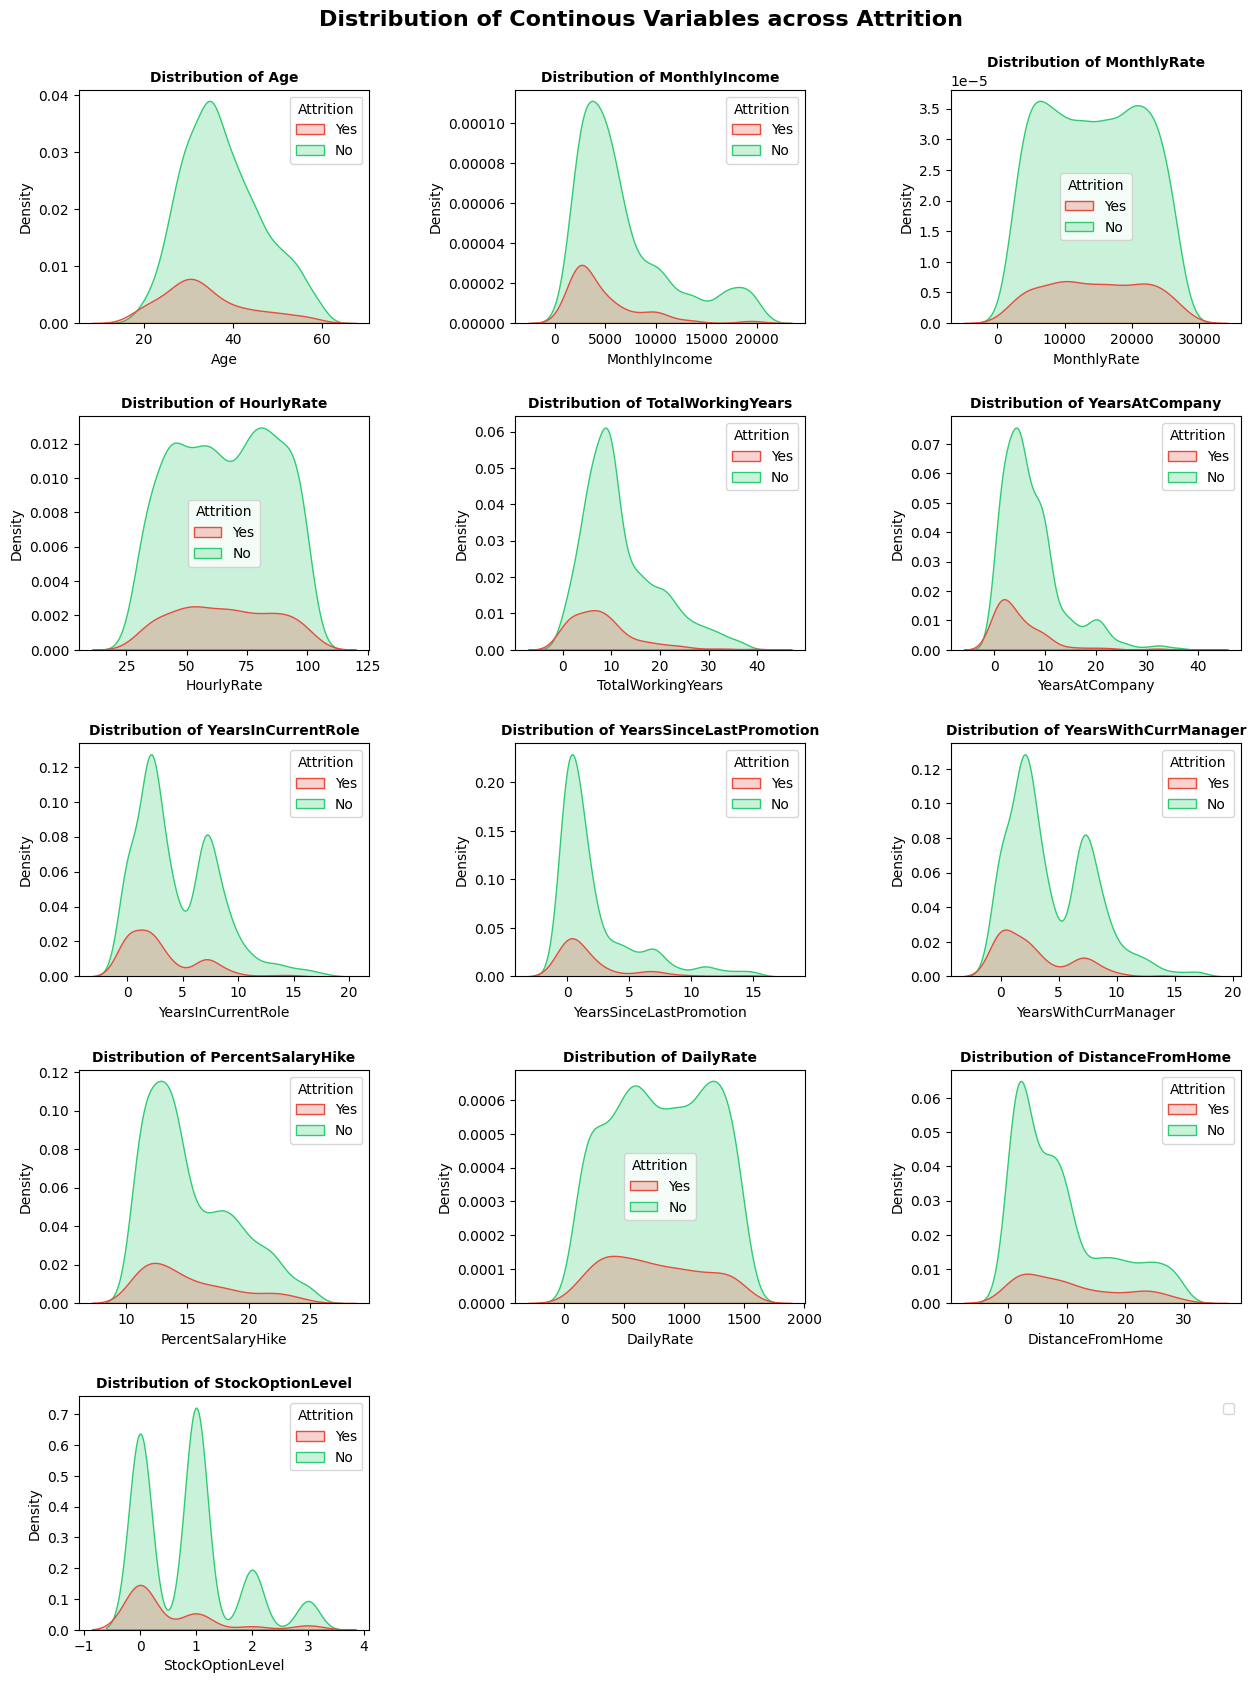

In [29]:
fig, axes = plt.subplots(5,3, figsize =(15,20))
axes = axes.flatten()

fig.subplots_adjust(hspace=0.4, wspace=0.5)
k=0

custom_palette = {'Yes': '#E74C3C', 'No': '#2ECC71'}

for i in continuous_cols:
  sns.kdeplot(data = df, x= i,hue ='Attrition', fill=True, ax = axes[k], color ='red', palette = custom_palette)
  axes[k].set_title(f'Distribution of {i}', fontsize = 10, fontweight ='bold')
  k+=1

axes[13].axis('off')
axes[14].axis('off')
plt.suptitle('Distribution of Continous Variables across Attrition', fontsize = 16, fontweight ='bold', y=0.92, x=0.5, va ='top')
plt.legend(loc = 'upper right',bbox_to_anchor=(1, 1))

From the distribution charts it is very clear that all the distributions are not symmetrical aka not normal and some distributions has a long/short tail to their right.

- MonthlyIncome
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole (bimodal)
- YearsSinceLastPromotion
- YearsWithCurrManager(bimodal)

The above distributions have skewness which are visible to the naked eye from the distributions. However to be sure we will proceed with a Skewness and Transformation Analysis.

###Normality Testing of Contiuous Variables




##### <u>**Shapiro-Wilk Test**</u>
We will use Shapiro Wilk test as the sample data is small to moderate. Ideal for n<=50 but works upto n=5000

Generally Shapiro-Wilk test is used to check if the sample comes from a normally distributed variable.
- Handles minor deviations from normality better than KS or even Anderson-Darling in small data settings.
- For large samples tiny deviations from normality might lead to rejecting NH even though the distribution is normal.

##### <u>**Kolmogorv-Smirnov Test**</u>

For large samples we can go for Kolmogorov-Smirnoff Test which is a non-parametric test that measures the largest difference between the sample's empirical cumulative distribution function (ECDF) and the theoretical cumulative distribution function (CDF) against threshold values.

- We use 1-tailed KS Test for Normality which is comparing out variable's distribution to a reference distribution (like normal/exponential etc).
- We use 2-tailed KS Test which is comparing if two samples come from the same distribution or not(pre vs post/ Treatment vs Control etc).

##### <u>**Jarque-Bera Test**</u>
The Jarque-Bera (JB) test is a statistical test used to determine whether a dataset/sample follows a normal distribution, based on its skewness and kurtosis.

- Under the null hypothesis of normality, the JB statistic follows a chi-squared distribution with 2 degrees of freedom.
- Used for large samples, where Shapiro Wilk fails. Used to assess the residuals in regression analysis



In [30]:
#H0: Distribution is Normal (reference distribution)
#H1: Distirbution is not Normal (reference distribution)

from scipy.stats import shapiro

normality_dict ={}
for col in continuous_cols:
  shapiro_dict={}
  stat,p = shapiro(df[col])
  shapiro_dict['test_stat'] = float(stat)
  shapiro_dict['p_value'] = float(p)

  if p<0.05:
    shapiro_dict['Distribution'] = 'Not Normal'
  else:
    shapiro_dict['Distribution'] = 'Normal'

  normality_dict[col] = shapiro_dict
normality_dict

normality = pd.DataFrame.from_dict(normality_dict, orient ='index')
normality.index.name = 'Continuous_Variables'
normality

test_stat       p_value Distribution
Continuous_Variables                                         
Age                       0.977449  2.036924e-14   Not Normal
MonthlyIncome             0.827907  4.402394e-37   Not Normal
MonthlyRate               0.954464  5.516502e-21   Not Normal
HourlyRate                0.955031  7.418846e-21   Not Normal
TotalWorkingYears         0.907429  5.630922e-29   Not Normal
YearsAtCompany            0.838993  3.668867e-36   Not Normal
YearsInCurrentRole        0.896187  2.142707e-30   Not Normal
YearsSinceLastPromotion   0.703728  4.772965e-45   Not Normal
YearsWithCurrManager      0.897457  3.055796e-30   Not Normal
PercentSalaryHike         0.900606  7.480740e-30   Not Normal
DailyRate                 0.954398  5.329330e-21   Not Normal
DistanceFromHome          0.861588  4.080847e-34   Not Normal
StockOptionLevel          0.789519  6.100996e-40   Not Normal

In [31]:
#H0: Distribution is Normal (reference distribution)
#H1: Distirbution is not Normal (reference distribution)

from scipy.stats import kstest,zscore

normality_dict ={}
for col in continuous_cols:
  ks_dict={}
  z = zscore(df[col])
  stat,p= kstest(z,'norm')
  ks_dict['test_stat'] = float(stat)
  ks_dict['p_value'] = float(p)

  if p<0.05:
    ks_dict['Distribution'] = 'Not Normal'
  else:
    ks_dict['Distribution'] = 'Normal'

  normality_dict[col] = ks_dict
normality_dict

normality = pd.DataFrame.from_dict(normality_dict, orient ='index')
normality.index.name = 'Continuous_Variables'
normality

test_stat        p_value Distribution
Continuous_Variables                                          
Age                       0.083145   2.740503e-09   Not Normal
MonthlyIncome             0.168942   3.802521e-37   Not Normal
MonthlyRate               0.065775   5.668819e-06   Not Normal
HourlyRate                0.069121   1.496647e-06   Not Normal
TotalWorkingYears         0.193227   1.499009e-48   Not Normal
YearsAtCompany            0.156395   7.207793e-32   Not Normal
YearsInCurrentRole        0.188708   2.613798e-46   Not Normal
YearsSinceLastPromotion   0.281925  7.515769e-104   Not Normal
YearsWithCurrManager      0.188780   2.409864e-46   Not Normal
PercentSalaryHike         0.185985   5.514326e-45   Not Normal
DailyRate                 0.070794   7.502058e-07   Not Normal
DistanceFromHome          0.158275   1.240621e-32   Not Normal
StockOptionLevel          0.253587   8.229669e-84   Not Normal

###Group Difference Testing

#####Since all the continuous variables are not continuous we will go for Mann-Whitney U Test to check if there exists significant difference between the continuous variables across Attrited and Not Attrited groups.

##### Had the data been Nomally distributed/ Sample size was smaller we would have gone for T-test.

In [32]:
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

We will be comparing across two different groups of attrition

In [33]:
from scipy.stats import mannwhitneyu

var ={}
for col in continuous_cols:
  test_dict ={}
  df_attr = df[df['Attrition']=='Yes'][col]
  df_not_attr = df[df['Attrition']=='No'][col]

  stat,p = mannwhitneyu(df_attr, df_not_attr, alternative ='two-sided')
  test_dict['stat'] = float(stat)
  test_dict['p'] = round(float(p),4)

  if float(p) <0.05:
    test_dict['Result'] = 'Different Distribution'
  else:
    test_dict['Result'] = 'Same Distribution'
  var[col] = test_dict

group_diff = pd.DataFrame.from_dict(var, orient='index').reset_index()
display(group_diff)

index      stat       p                  Result
0                       Age  106859.0  0.0000  Different Distribution
1             MonthlyIncome  100620.5  0.0000  Different Distribution
2               MonthlyRate  149610.5  0.5587       Same Distribution
3                HourlyRate  144575.5  0.7976       Same Distribution
4         TotalWorkingYears  100567.0  0.0000  Different Distribution
5            YearsAtCompany  102582.0  0.0000  Different Distribution
6        YearsInCurrentRole  105214.0  0.0000  Different Distribution
7   YearsSinceLastPromotion  134374.0  0.0412  Different Distribution
8      YearsWithCurrManager  106361.5  0.0000  Different Distribution
9         PercentSalaryHike  140726.5  0.3655       Same Distribution
10                DailyRate  133042.0  0.0290  Different Distribution
11         DistanceFromHome  164225.5  0.0024  Different Distribution
12         StockOptionLevel  109611.0  0.0000  Different Distribution

### Mann–Whitney U Test Summary

This analysis compares distributional differences across key features between employees who **stayed** and those who **left**, using the Mann–Whitney U test. Variables with statistically significant p-values (p < 0.05) indicate potential influence on attrition behavior.

---

##### 🔍 Features with Statistically Different Distributions (p < 0.05)

These features may be correlated with attrition and warrant further modeling or visualization:

| Feature                  | p-value   | Interpretation |
|--------------------------|-----------|----------------|
| Age                     | 0.0000    | Age distribution varies significantly; attrition may be age-dependent |
| MonthlyIncome           | 0.0000    | Income levels differ across groups—potential attrition driver |
| TotalWorkingYears       | 0.0000    | Experience impacts employee decisions |
| YearsAtCompany          | 0.0000    | Clear tenure difference between groups |
| YearsInCurrentRole      | 0.0000    | Role duration linked with leaving pattern |
| YearsSinceLastPromotion | 0.0412    | Promotion delays may increase attrition |
| YearsWithCurrManager    | 0.0000    | Managerial stability matters |
| DailyRate               | 0.0290    | Operational or departmental effects visible here |
| DistanceFromHome        | 0.0024    | Commute may influence retention |
| StockOptionLevel        | 0.0000    | Retention benefits possibly affecting decisions |

---

##### ⚖️ Features with No Significant Difference (p ≥ 0.05)

These features show no statistical evidence of distributional change between attrition groups:

| Feature            | p-value   | Interpretation |
|--------------------|-----------|----------------|
| MonthlyRate        | 0.5587    | Unlikely to impact attrition directly |
| HourlyRate         | 0.7976    | No significant variation across groups |
| PercentSalaryHike  | 0.3655    | Raise % alone may not influence decisions to stay |

---

##### ✅ Next Steps


- **Model attrition** using logistic regression or tree-based methods with significant predictors
- **Validate findings** with SHAP values or permutation importance


###Skewness and Transformation Analysis

Continuous_Variables  Skew Value        Skew Result
0                       Age       0.413         Not Skewed
1             MonthlyIncome       1.370  Positively Skewed
2               MonthlyRate       0.019         Not Skewed
3                HourlyRate      -0.032         Not Skewed
4         TotalWorkingYears       1.117  Positively Skewed
5            YearsAtCompany       1.765  Positively Skewed
6        YearsInCurrentRole       0.917         Not Skewed
7   YearsSinceLastPromotion       1.984  Positively Skewed
8      YearsWithCurrManager       0.833         Not Skewed
9         PercentSalaryHike       0.821         Not Skewed
10                DailyRate      -0.004         Not Skewed
11         DistanceFromHome       0.958         Not Skewed
12         StockOptionLevel       0.969         Not Skewed

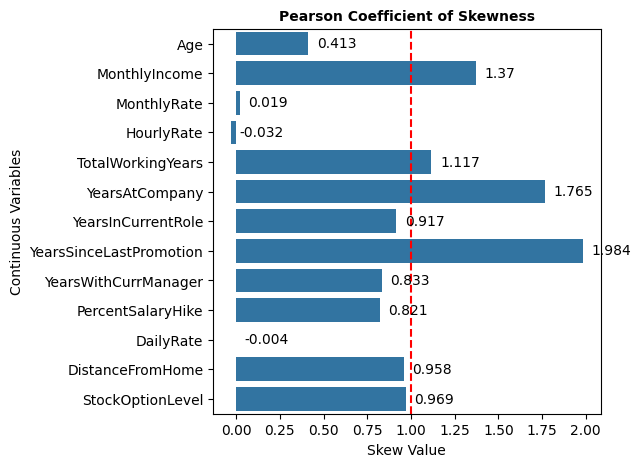

In [35]:
skew_dict ={}
for col in continuous_cols:
  skew_table ={}
  skew_value = round(float(df[col].skew()),3)
  if skew_value > 1:
    skew_result= 'Positively Skewed'
  elif skew_value < -1:
    skew_result= 'Negatively Skewed'
  elif -1<=skew_value<=1:
    skew_result= 'Not Skewed'
  skew_table['Skew Value'] = skew_value
  skew_table['Skew Result'] = skew_result

  skew_dict[col] = skew_table

skew_data = pd.DataFrame.from_dict(skew_dict, orient ='index')
skew_data.index.name = 'Continuous_Variables'
skew_data.reset_index(inplace =True)
display(skew_data)

plt.figure(figsize =(5,5))
sns.barplot(data =skew_data, y='Continuous_Variables', x='Skew Value')

for i, value in enumerate(skew_data['Skew Value']):
    plt.text(value + 0.05, i, str(value), va='center')

plt.axvline(1, color = 'red', linestyle ='--')
plt.xlabel('Skew Value')
plt.ylabel('Continuous Variables')
plt.title('Pearson Coefficient of Skewness', fontweight = 'bold', fontsize = 10)

skewed_items =skew_data[skew_data['Skew Value']>1]['Continuous_Variables'].tolist()

We can see that the skewness of the fields > 1(positively skewed) are
- MonthlyIncome
- TotalWorkingYears
- YearsAtCompany
- YearsSinceLastPromotion

Need to transform these variables before proceeding towards modelling.

### Box Plots of Continuous Variables

Text(0.5, 0.92, 'Box Plot of Continuous Variables across Attrition')

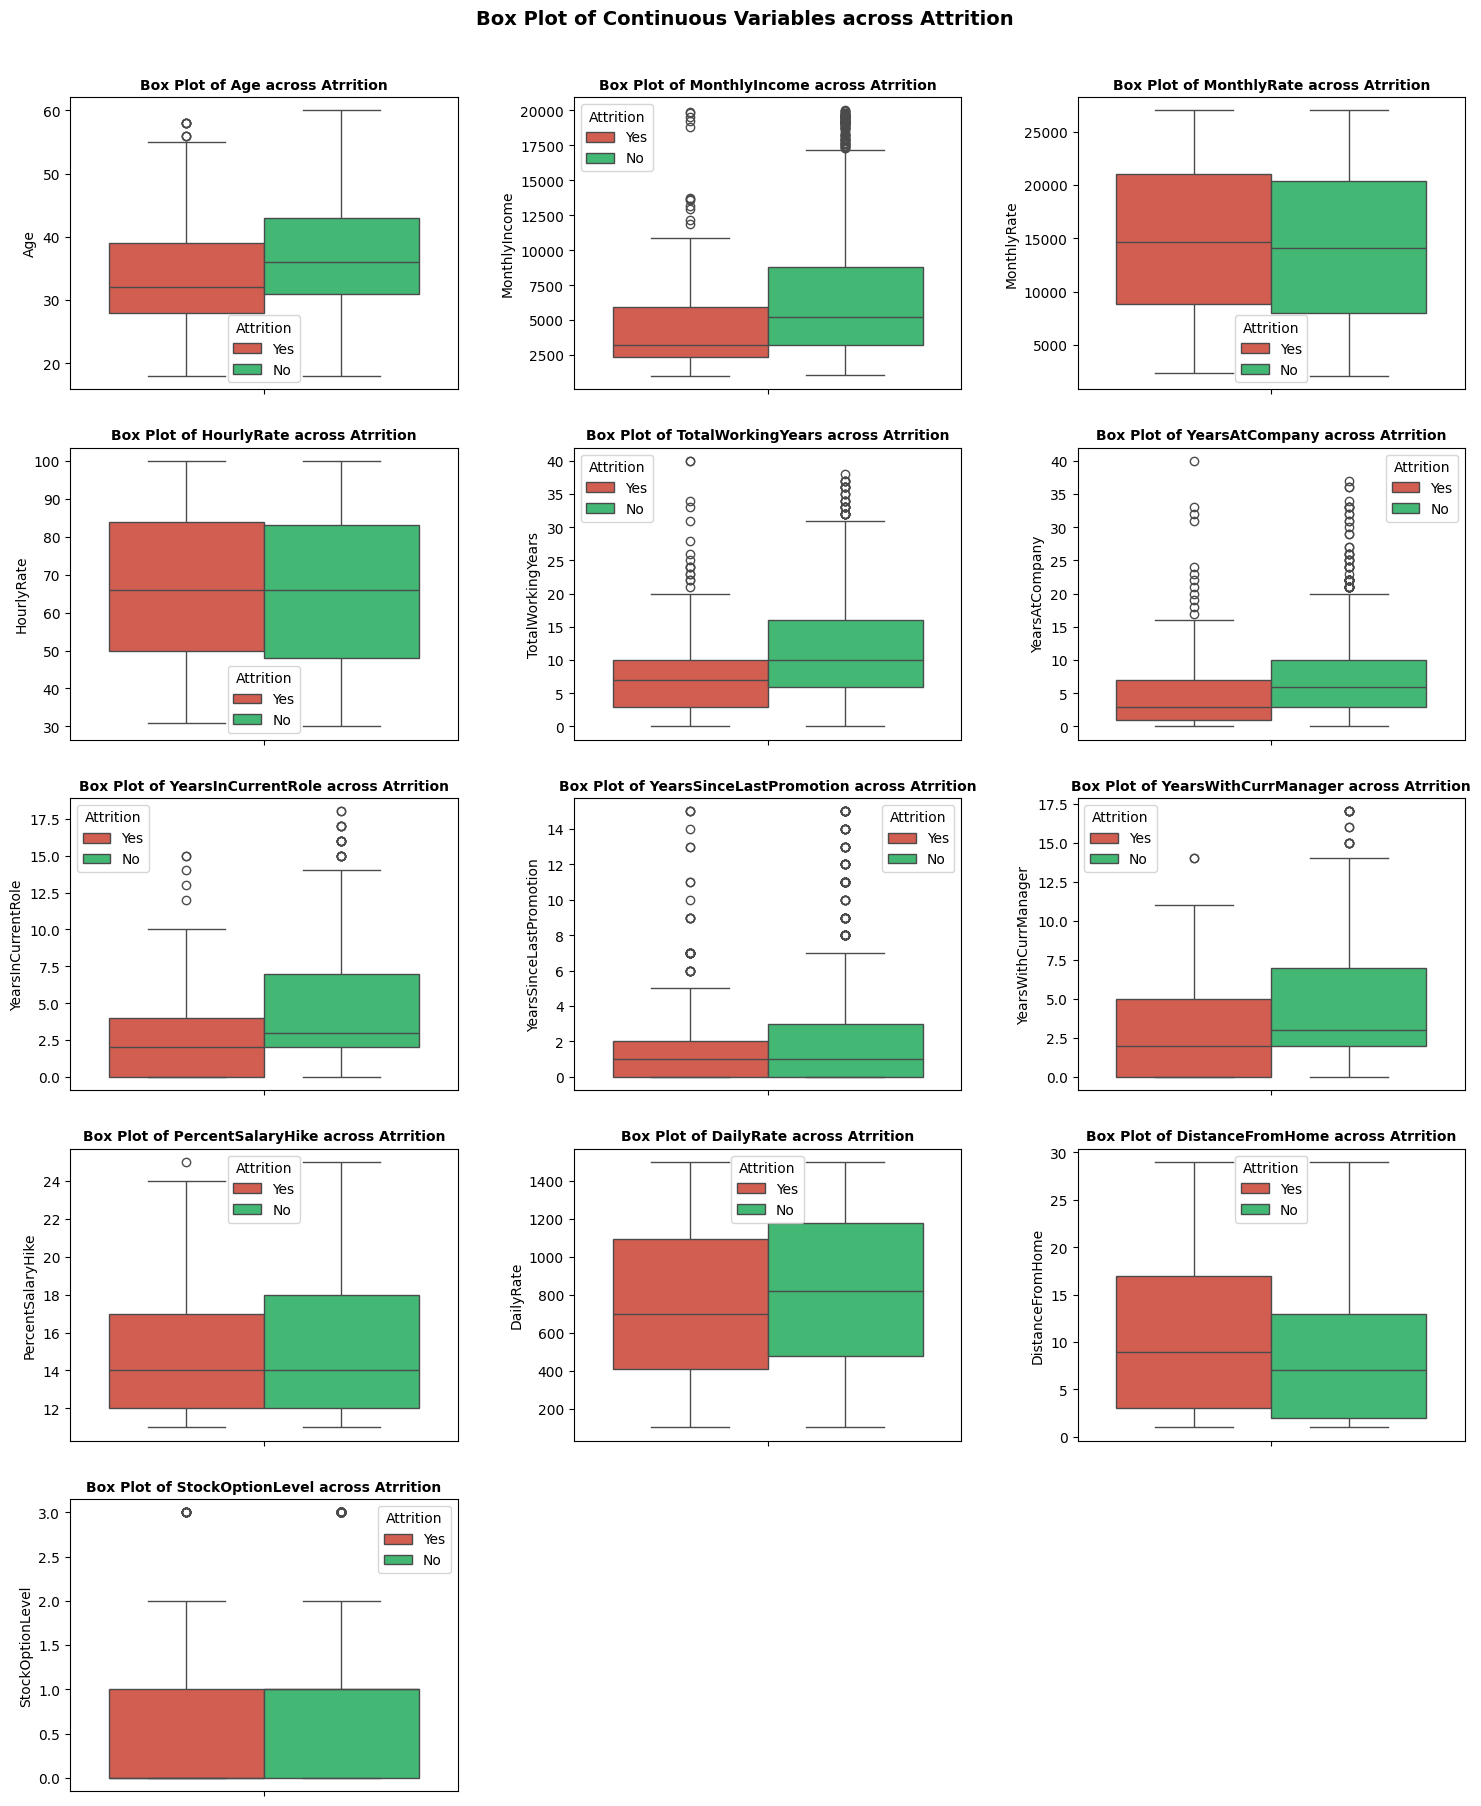

In [36]:
fig,axes = plt.subplots(5,3, figsize = (18,22))
axes =axes.flatten()
fig.subplots_adjust(hspace =0.2, wspace=0.3)
k=0

for col in continuous_cols:
  sns.boxplot(data =df, y=col, hue='Attrition', palette= custom_palette, ax=axes[k])
  axes[k].set_title(f'Box Plot of {col} across Atrrition', fontsize =10, fontweight ='bold')
  k+=1
axes[13].axis('off')
axes[14].axis('off')

plt.suptitle('Box Plot of Continuous Variables across Attrition', fontsize =14, fontweight ='bold', x= 0.5, y=0.92, va ='top' )

###Violin Plot of Continuous Variables across Attrition

This is KDE of the continuous variables and mirrors the distribution on both sides to show the density of x at any given point. Within the Violin plot we find the Box and Whisker Plots of each distribution.

Text(0.5, 0.92, 'Violin Plot of Continuous Variables across Attrition')

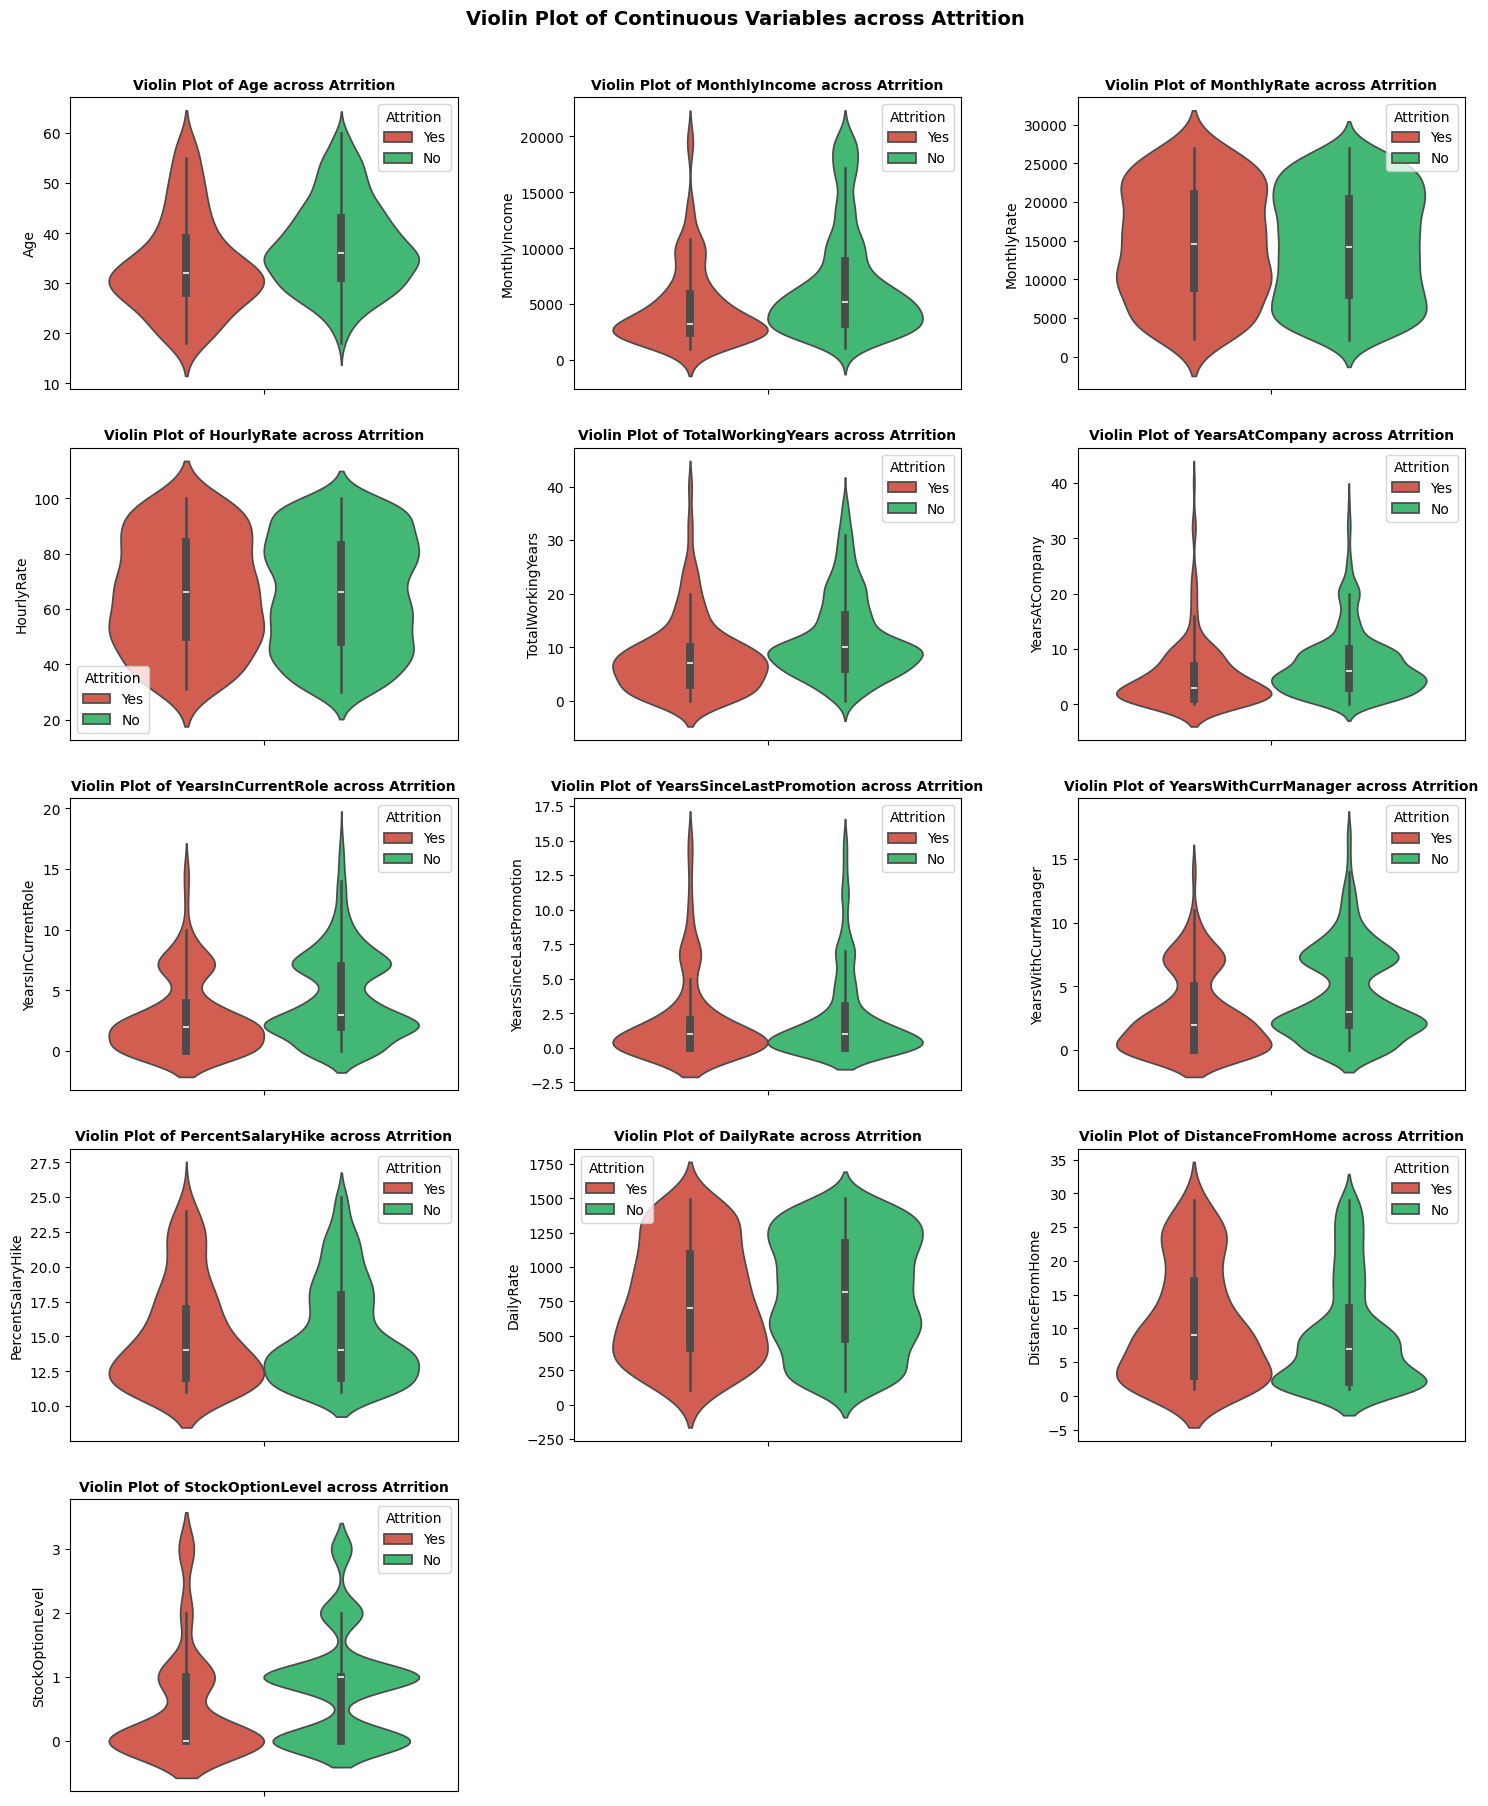

In [64]:
fig,axes = plt.subplots(5,3, figsize = (18,22))
axes =axes.flatten()
fig.subplots_adjust(hspace =0.2, wspace=0.3)
k=0

for col in continuous_cols:
  sns.violinplot(data =df, y=col, hue='Attrition', palette= custom_palette, ax=axes[k])
  axes[k].set_title(f'Violin Plot of {col} across Atrrition', fontsize =10, fontweight ='bold')
  k+=1
axes[13].axis('off')
axes[14].axis('off')

plt.suptitle('Violin Plot of Continuous Variables across Attrition', fontsize =14, fontweight ='bold', x= 0.5, y=0.92, va ='top')

###Outlier Detection

These fields below are heavily right skewed with Skewness > 1 and from the Shapiro Wilk Test we can see that these distributions are not normal.

- MonthlyIncome
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

We will use an Outlier Detection Method on these and that will be IQR.

This is primarily due to the fact that since these variables are highly right skewed there is a chance that means will be pull by the skewness of the distributions.

Hence computing the zscore method might not help.

Variables  Outlier_Count
0                       Age            173
1             MonthlyIncome            213
2               MonthlyRate             16
3                HourlyRate              0
4         TotalWorkingYears            237
5            YearsAtCompany            200
6        YearsInCurrentRole            107
7   YearsSinceLastPromotion            260
8      YearsWithCurrManager            100
9         PercentSalaryHike            123
10                DailyRate              0
11         DistanceFromHome            204
12         StockOptionLevel            243

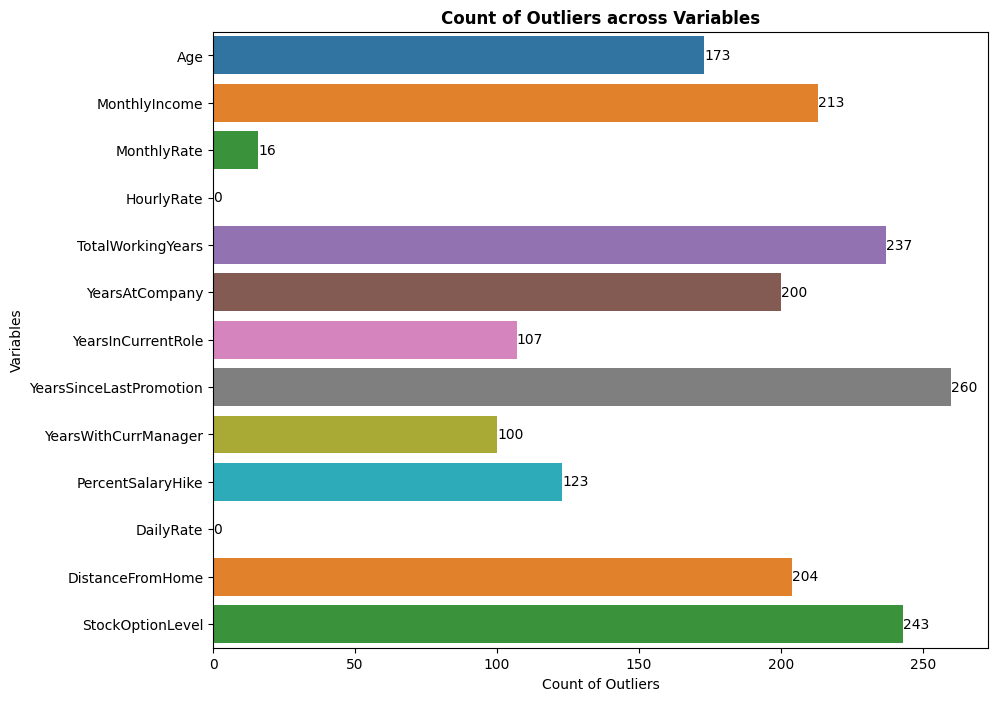

In [63]:
## calculate IQR

def calculate_iqr(df):
  outlier_dict = {}
  for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lowerbound = Q1- (1.5*IQR)
    upperbound = Q1+ (1.5*IQR)

    outlier = df[(df[col]<lowerbound) | (df[col]>upperbound)][col]
    outlier_dict[col] = outlier.shape[0]

  outlier_df = pd.DataFrame.from_dict(outlier_dict, orient = 'index').reset_index()
  outlier_df.columns =['Variables','Outlier_Count']
  return outlier_df
display(calculate_iqr(df))

fig,axes = plt.subplots(1,1,figsize=(10,8))
sns.barplot(data= calculate_iqr(df), y='Variables', x='Outlier_Count',palette='tab10')
for i, value in enumerate(calculate_iqr(df)['Outlier_Count']):
    plt.text(value + 0.05, i, str(value), va='center')
plt.title("Count of Outliers across Variables", fontweight ='bold', fontsize =12)
plt.xlabel("Variables")
plt.xlabel("Count of Outliers")
plt.show()

###Correlation Analysis of Continuous Variables

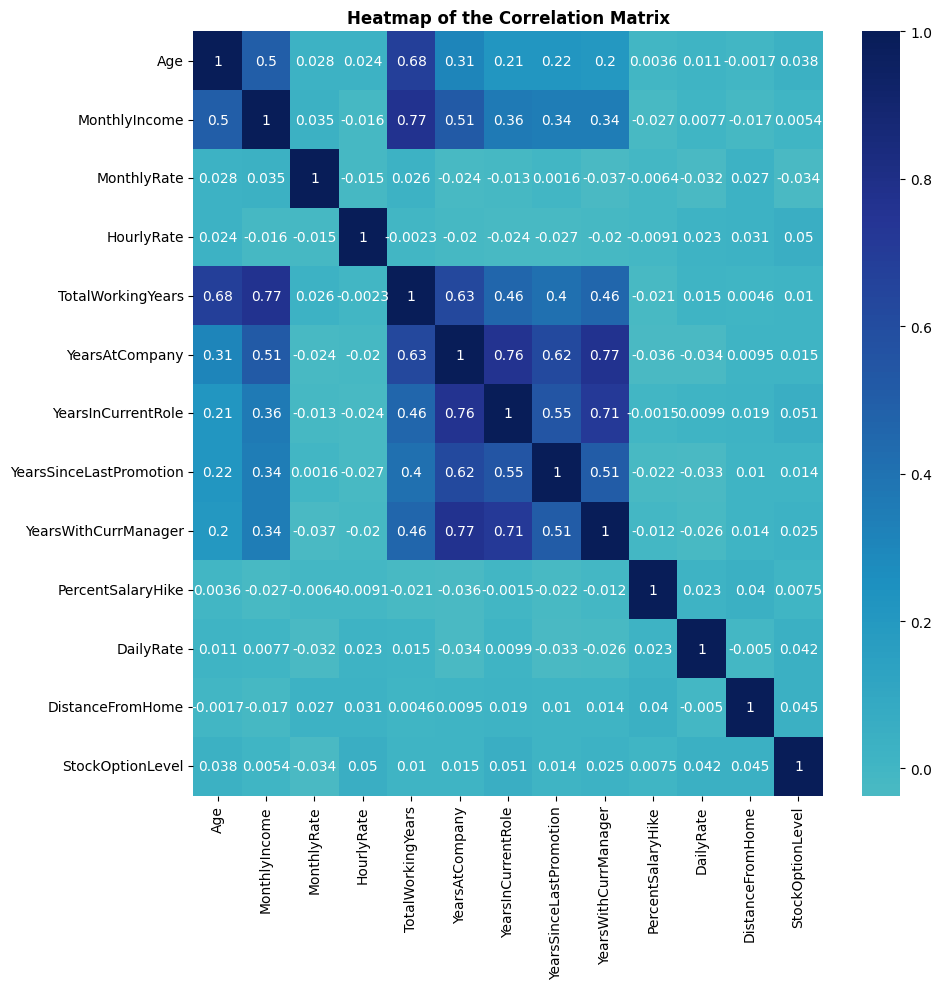

In [38]:
corr_matrix = df[continuous_cols].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data=corr_matrix, annot=True,cmap='YlGnBu', center=0 )
plt.title('Heatmap of the Correlation Matrix', fontweight ='bold')
plt.tight_layout()
plt.show()

####Insights from the Correlation Matrix Heatmap

You've got a strong mix of employee-related numerical features, and several are highly correlated, which flags multicollinearity risks:
- TotalWorkingYears & MonthlyIncome (0.77) → seasoned employees tend to earn more.
- YearsAtCompany & YearsInCurrentRole (0.76) → tenure closely relates to current role duration.
- YearsWithCurrManager & YearsAtCompany (0.68) → expected, but still worth monitoring.
- DailyRate, MonthlyRate, HourlyRate → weak to negligible correlations among themselves.

<u>Treatment</u>

- Keep Total Working Years and Monthly Income as it is as both are really important fields to model attrition.
- To remove Correation between YearsAtCompany & YearsInCurrentRole we will create a field RoleTenureRatio

  📊 RoleTenureRatio =  YearsInCurrentRole/YearsAtCompany

- To remove Correation between YearsWithCurrManager & YearsAtCompany we will create a field ManagerTenureRatio

  📊 ManagerTenureRatio =  YearsWithCurrManager/YearsAtCompany


### Treatment and Transformations

We will create two new variables
1.   **RoleTenureRatio** =  YearsInCurrentRole/YearsAtCompany
2.   **ManagerTenureRatio** =  YearsWithCurrManager/YearsAtCompany
3.   **Promotion** =  YearsWithCurrManager/YearsAtCompany

We will perform transformation on the following variables
1.   **TotalWorkingYears** - Log Transformation
2.   **YearsAtCompany** -Log Transformation
3.   **YearsSinceLastPromotion** -Log Transformation
4.   **Monthly Income** -Log Transformation




